# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
from numpy import dtype
import pandas as pd
import matplotlib.pyplot as plt
import random
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
import math

In [2]:
# tabele i obrazki z tytułami,
# wszystkie skróty objaśnione
# legenda kolorów
# komentarze do tabel
# na górze pdf podpisanie się
#
# na następny raz graham i jarvis gotowe implementacje
# po imieniu i numerze zadania napisać specyfikację
# krokowe przedstawienie etapów algorytmu

def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [4]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='purple')
    vis.add_point((6, 6), s=30, color='green')
    vis.add_point((7, 4), s=30, color='orange')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

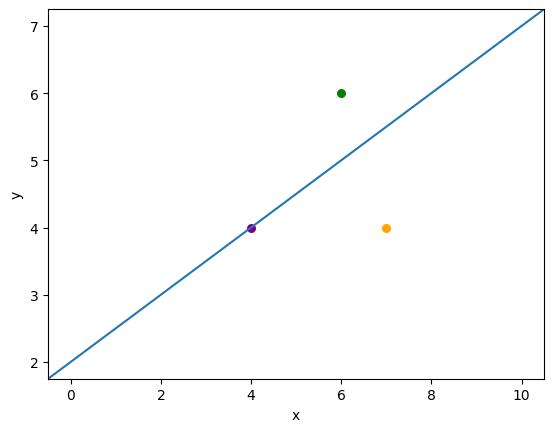

In [5]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [6]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    tab = []
    for _ in range(n):
        x = random.uniform(left, right)
        y = random.uniform(left, right)
        #print(x,y)
        tab.append((x, y))
    return tab

    #raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [7]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

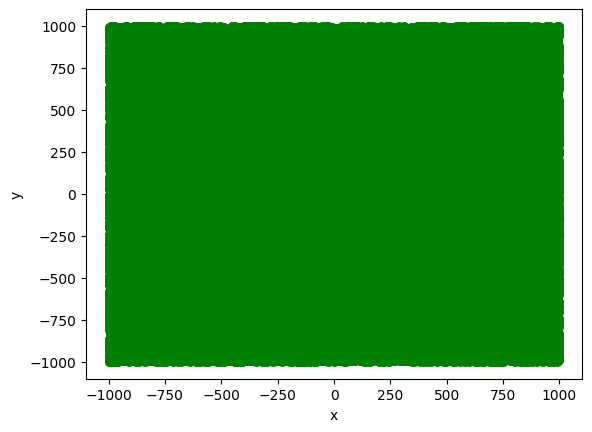

In [8]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [9]:
points_b = generate_uniform_points(-(10 ** 14), 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

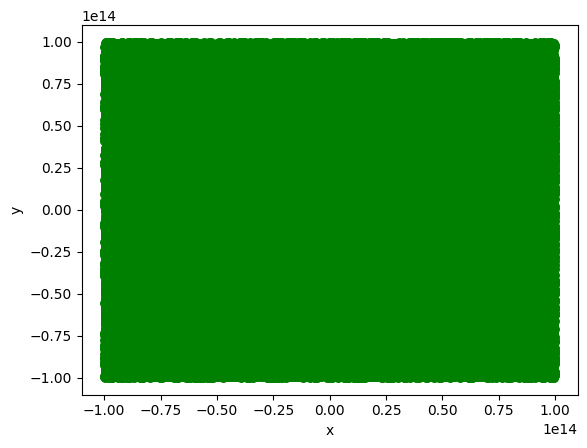

In [10]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [11]:
def generate_circle_points(O, R, n = 100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    tab = []
    for i in range(n):
        theta = random.uniform(0,2*math.pi)
        x = O[0] + R*math.cos(theta)
        y = O[1] + R*math.sin(theta)
        tab.append((x,y))
    return tab
       # raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [12]:
points_c = generate_circle_points((0, 0), 100,1000)

Zwizualizuj wygenerowane punkty.

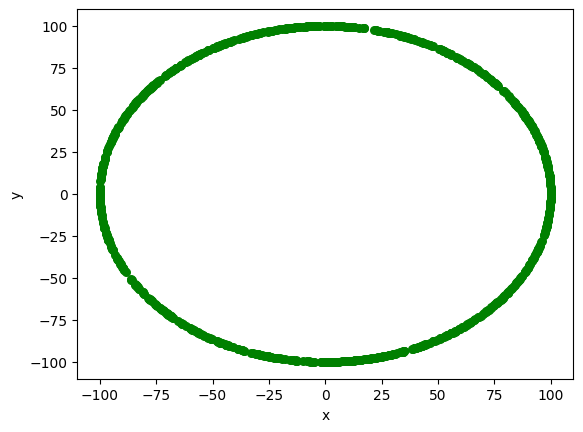

In [13]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [14]:
def generate_collinear_points(a, b, n=100,MIN = -1000, MAX = 1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych

    # y = A*x +B
    """

    ax, ay = a
    bx, by = b
    A = (by - ay)/(bx - ax)
    B = ay - A*ax
    res = []
    for _ in range(n):
        x = random.uniform(MIN, MAX)
        y = A*x + B
        res.append((x,y))
    return res

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [15]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1),1000, -1000, 1000)

Zwizualizuj wygenerowane punkty.

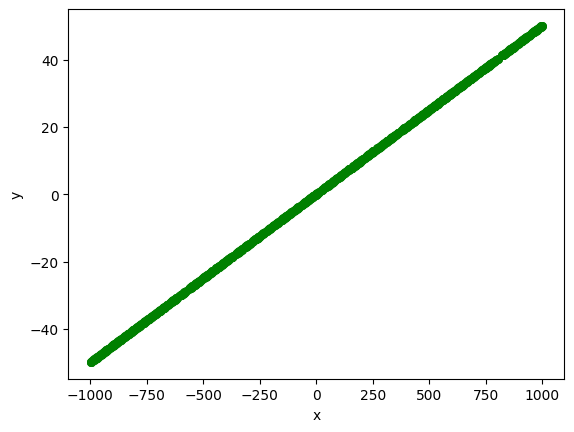

In [16]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [17]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.188s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [18]:
def mat_det_3x3(a, b, c,f32 = False):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    az = 1
    bx, by = b
    bz = 1
    cx, cy = c
    cz = 1
    det = ax*by*cz + ay*bz*cx + az*bx*cy - az*by*cx - ay*bx*cz - ax*bz*cy
    if f32:
        det = np.float32(det)
    return det
    #raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [19]:
def mat_det_3x3_lib(a, b, c,f32 = False):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    np_array = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    det = np.linalg.det(np_array)
    if f32:
        det = np.float32(det)
    return det
    # raise Exception("Unimplemented")

Uzupełnij funkcje ```mat_det_2x2```

In [20]:
def mat_det_2x2(a, b, c,f32 = False):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    det = (ax-cx)*(by-cy) - (ay-cy)*(bx-cx)
    if f32:
        det = np.float32(det)
    return det

    # raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [21]:

def mat_det_2x2_lib(a, b, c,f32 = False):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    np_array = np.array([[ax-cx,ay-cy],[bx-cx,by-cy]])
    det = np.linalg.det(np_array)
    if f32:
        det = np.float32(det)
    return det
    #raise Exception("Unimplemented")

Przetestujmy napisane powyżej funkcje.

In [22]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [23]:
def categorize_points(points, a, b, mat_det_func, eps,f32 = False):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """

    classified_points_left = []
    classified_points_mid = []
    classified_points_right = []
    for p in points:
        det = mat_det_func (a,b,p,f32)
        #print(type(det))
        # print(det)
        if det < -eps:
            classified_points_right.append(p)

        elif det > eps:
            classified_points_left.append(p)
        else:
            classified_points_mid.append(p)
    return classified_points_left,classified_points_mid,classified_points_right




         # raise Exception("Unimplemented")

In [24]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [25]:


classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -10)
print(len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

49813 0 50187


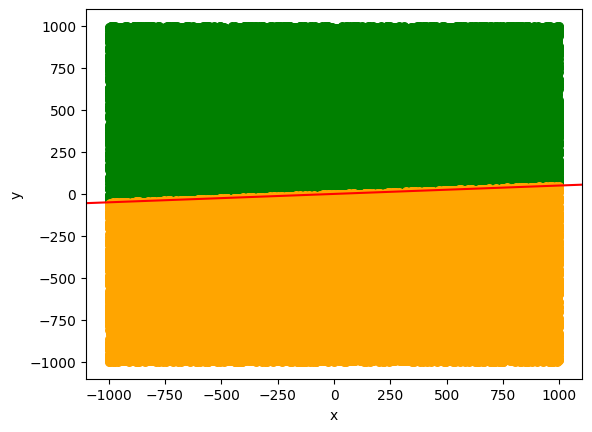

In [26]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [27]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -10)
print(len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

49938 6 50056


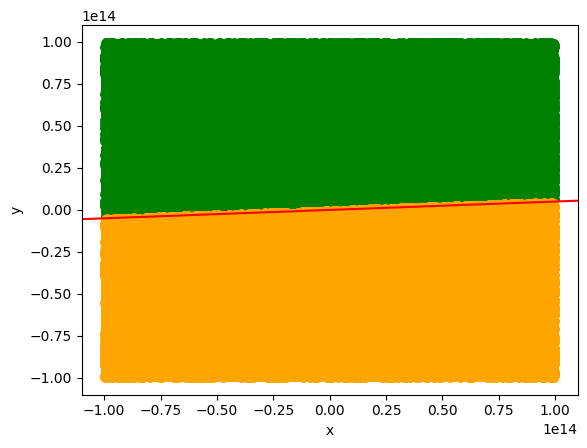

In [28]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [29]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

488 0 512


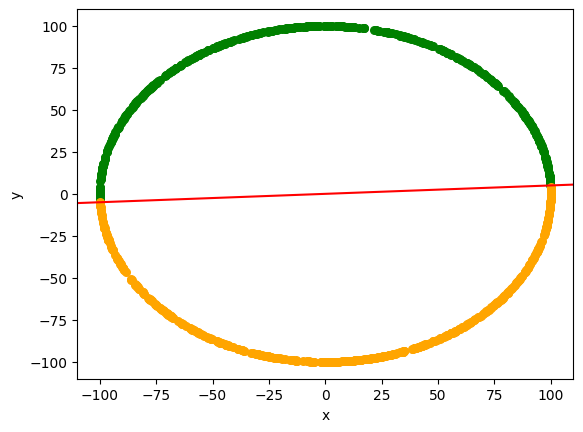

In [30]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [31]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -14)
print(len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

0 1000 0


Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [32]:
eps = [10**-14,10**-12,10**-10,10**-8]
det_funcs = [mat_det_3x3,mat_det_2x2,mat_det_3x3_lib,mat_det_2x2_lib]
float_32 = [False, True]
point_groups = [points_a,points_b,points_c,points_d]
names = ['A','B','C','D']
a = (-1.0, 0.0)
b = (1.0, 0.1)

group:  A



f_32:  False

function: mat_det_3x3
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3 f_32:  False
49813 0 50187
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3 f_32:  False
49813 0 50187
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3 f_32:  False
49813 0 50187
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3 f_32:  False
49813 0 50187

function: mat_det_2x2
eps:  1e-14
eps:  1e-14 det_func:  mat_det_2x2 f_32:  False
49813 0 50187
eps:  1e-12
eps:  1e-12 det_func:  mat_det_2x2 f_32:  False
49813 0 50187
eps:  1e-10
eps:  1e-10 det_func:  mat_det_2x2 f_32:  False
49813 0 50187
eps:  1e-08
eps:  1e-08 det_func:  mat_det_2x2 f_32:  False
49813 0 50187

function: mat_det_3x3_lib
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3_lib f_32:  False
49813 0 50187
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3_lib f_32:  False
49813 0 50187
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3_lib f_32:  False
49813 0 50187
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3_lib f_32:  False
49813 0 501

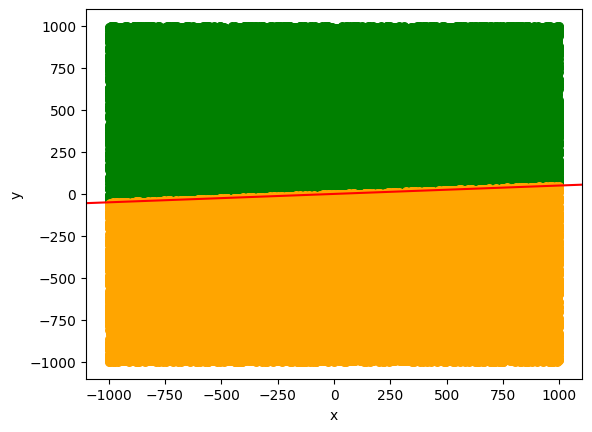

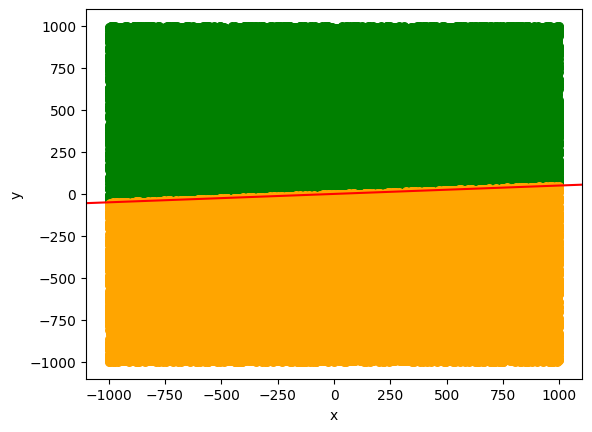

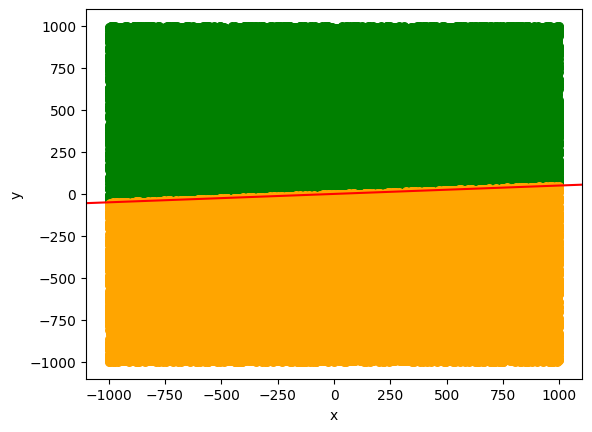

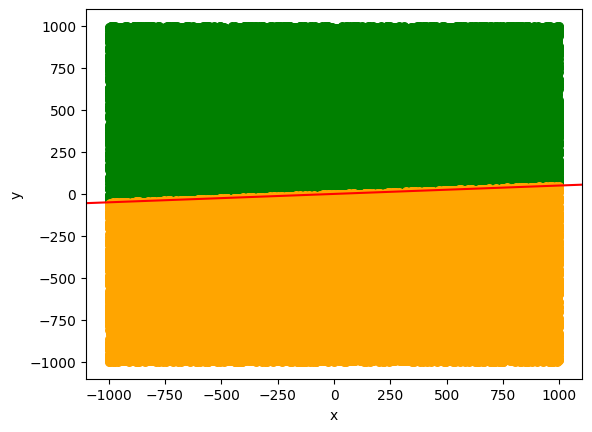

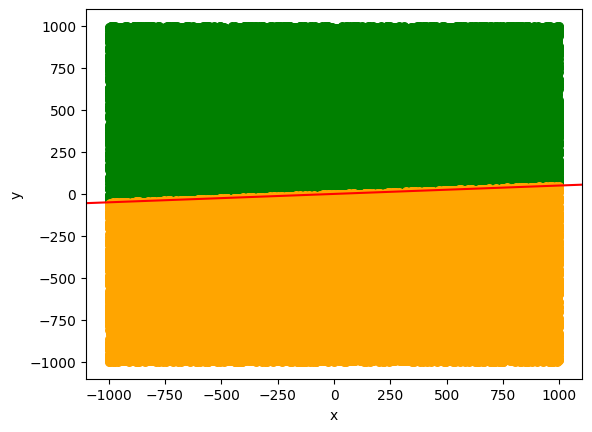

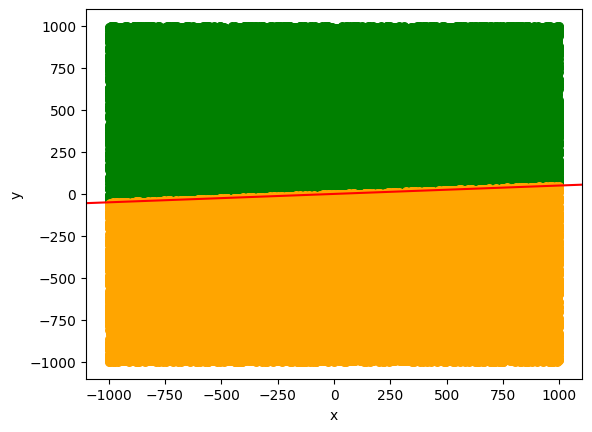

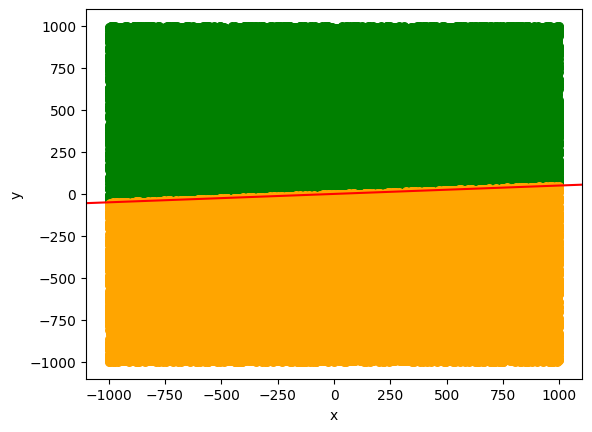

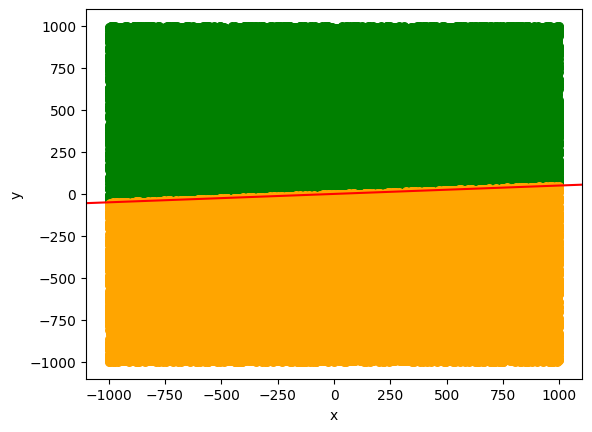

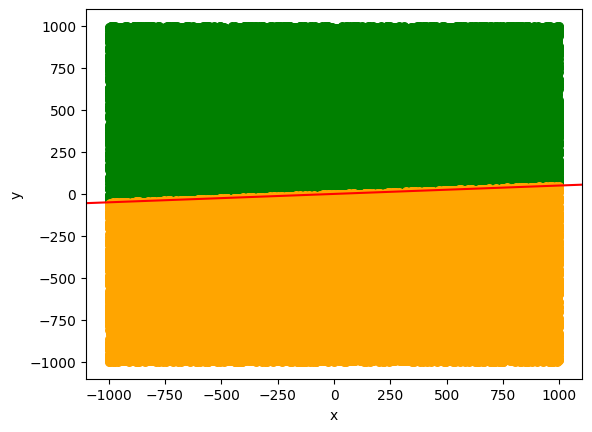

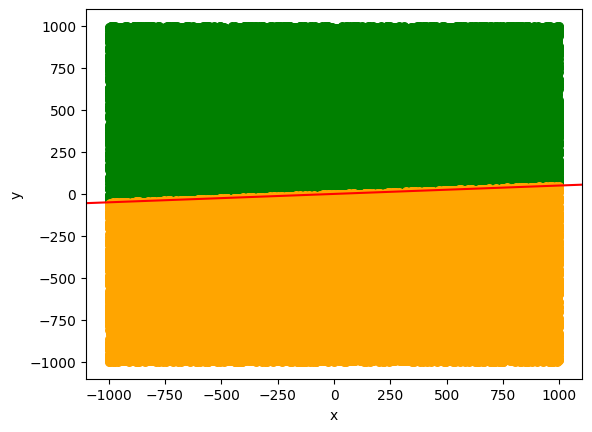

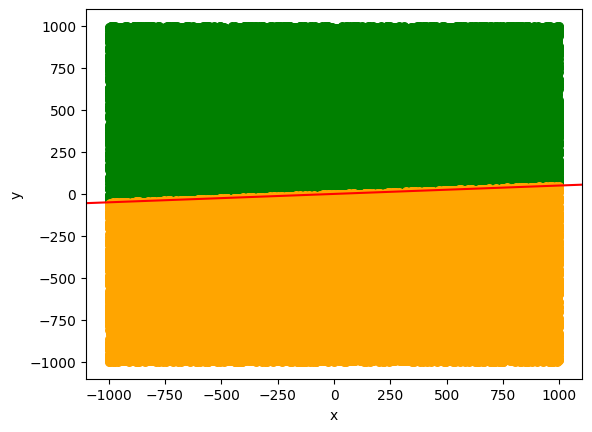

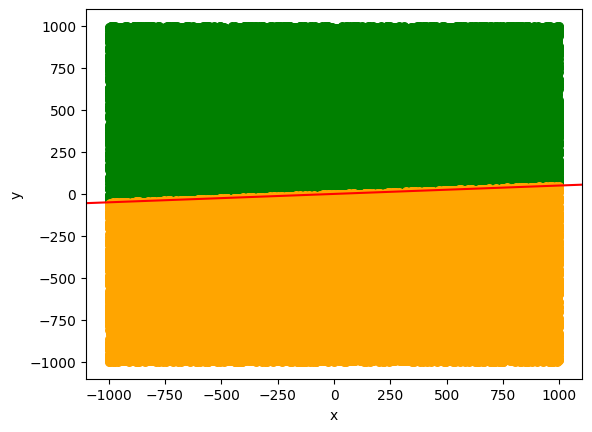

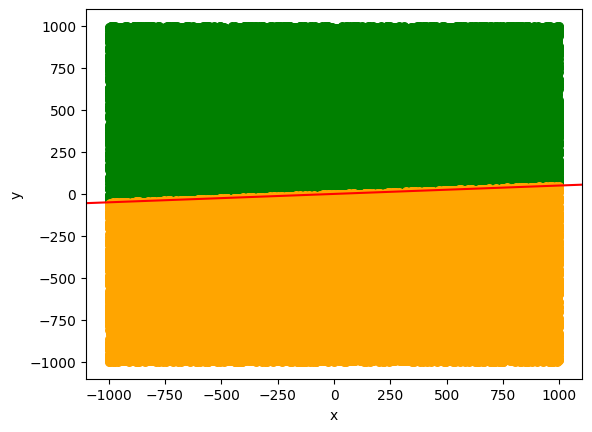

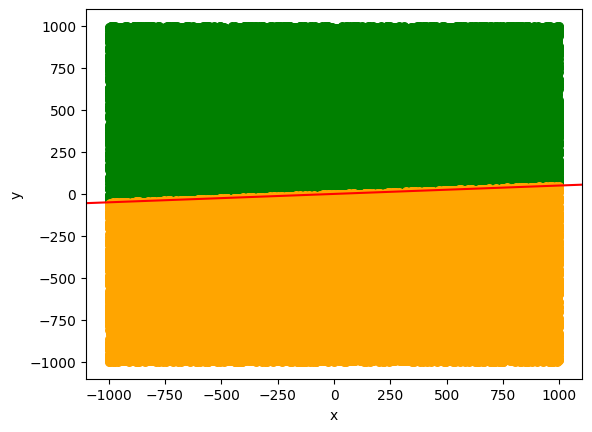

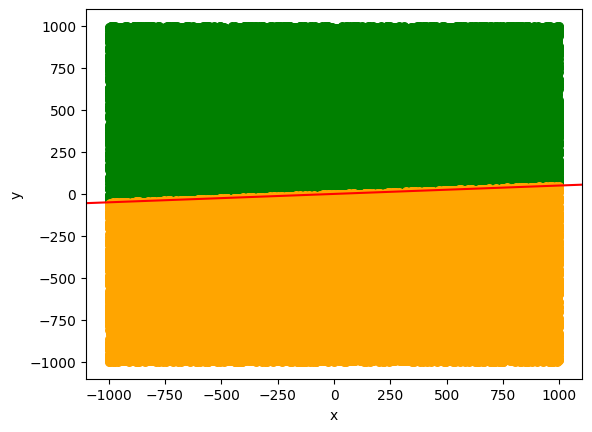

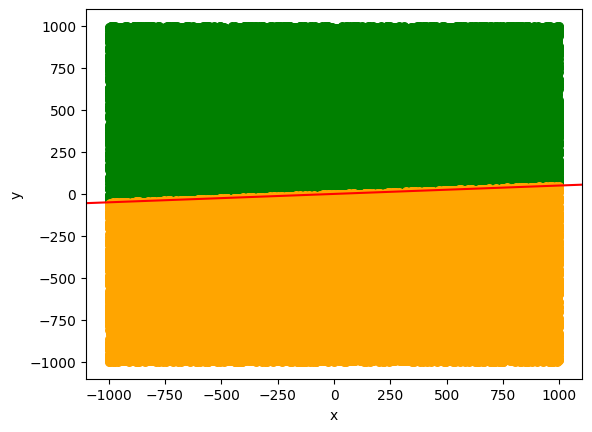

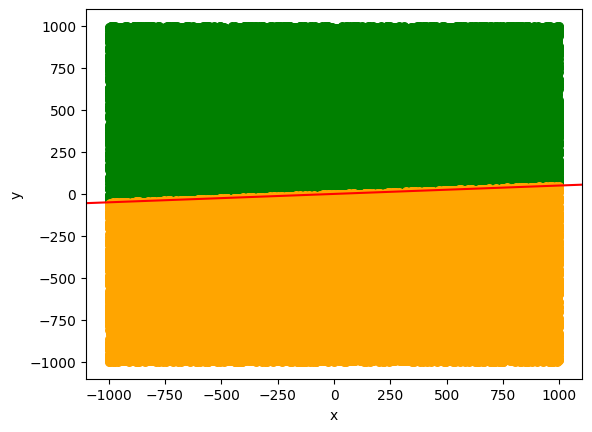

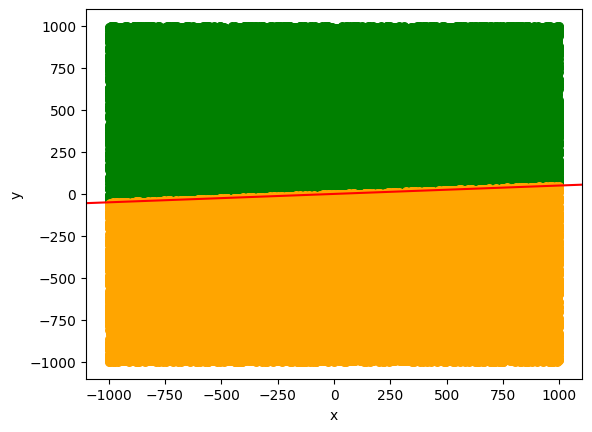

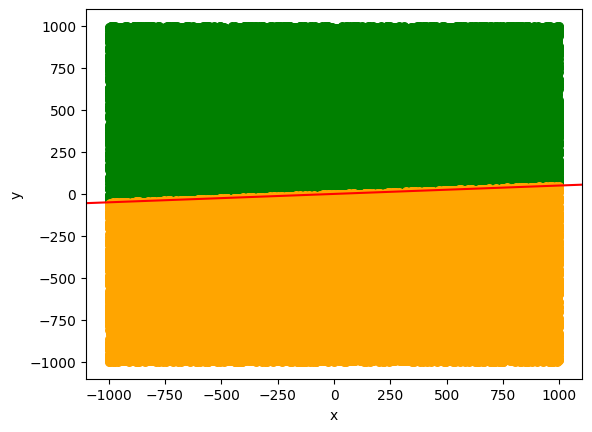

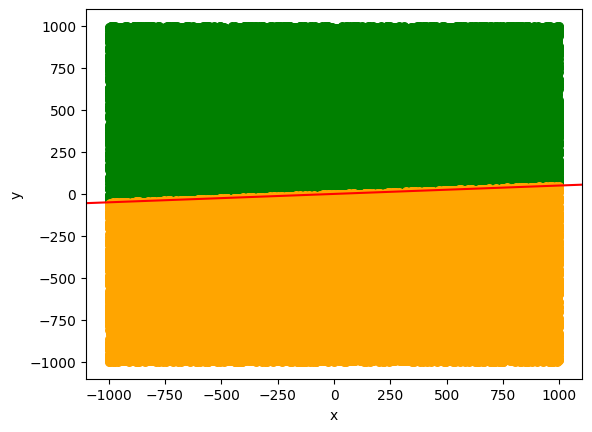

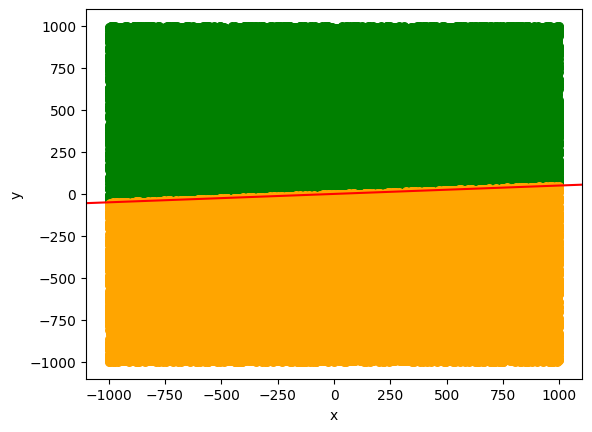

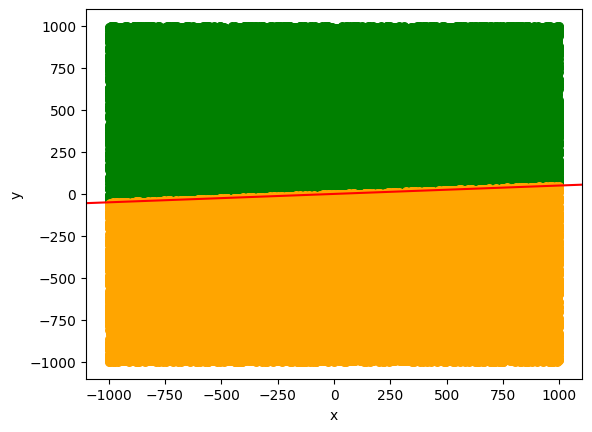

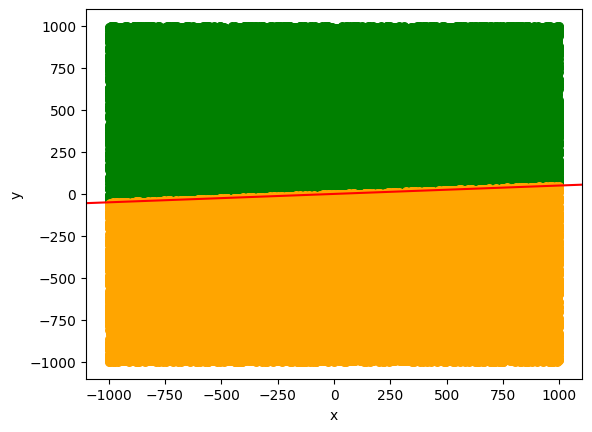

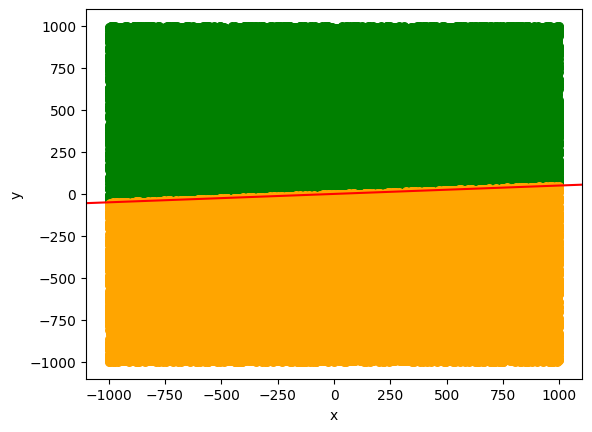

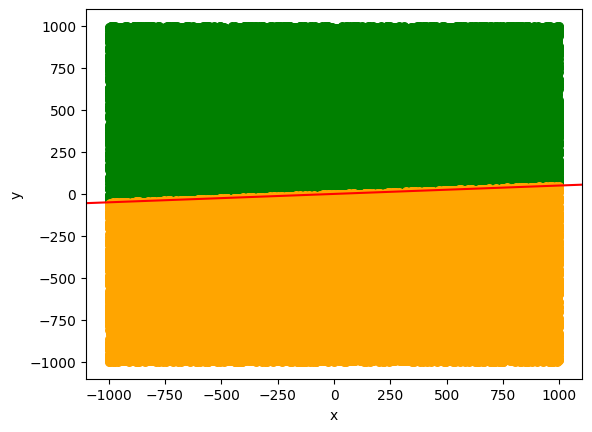

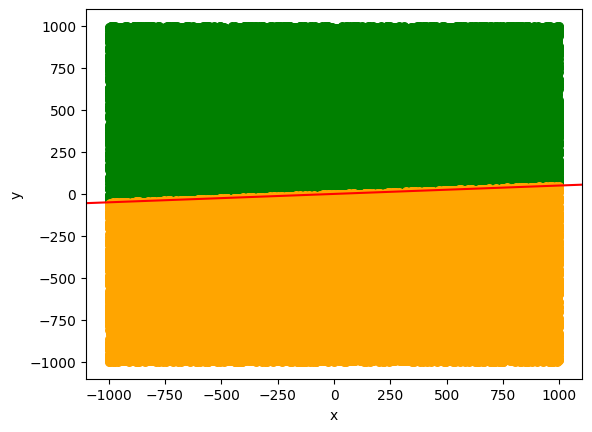

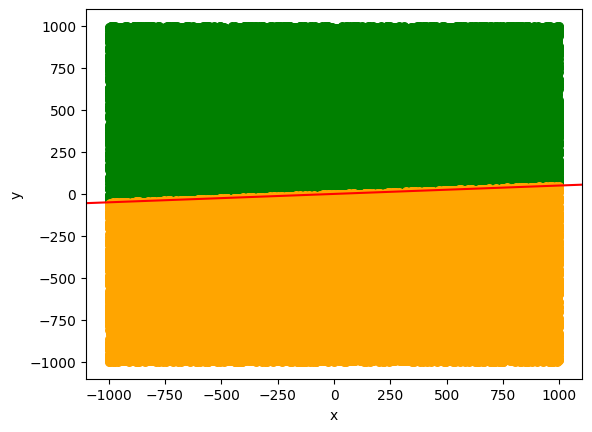

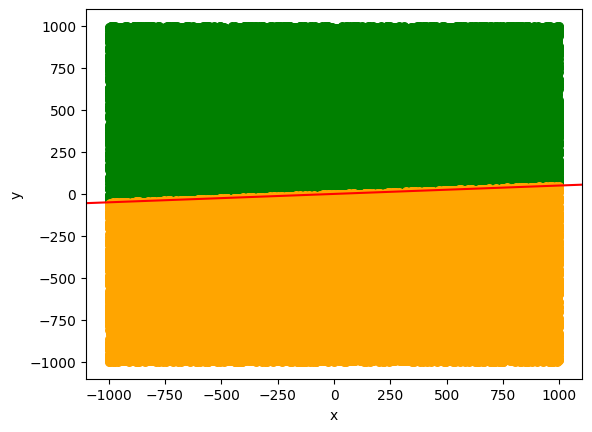

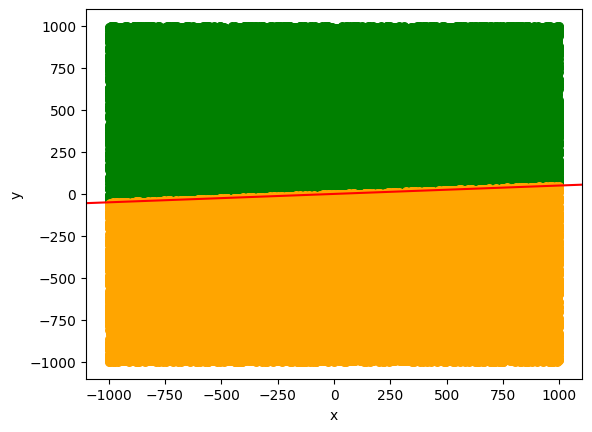

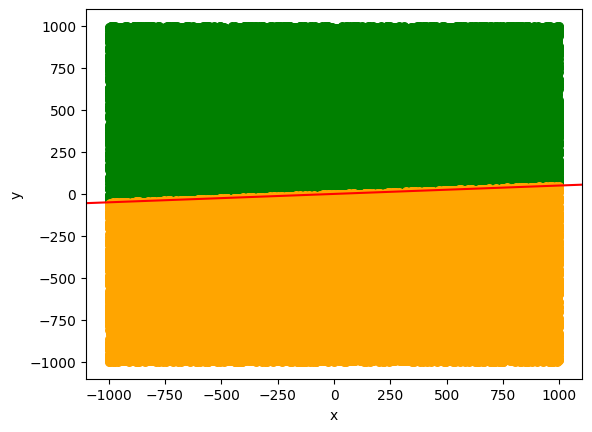

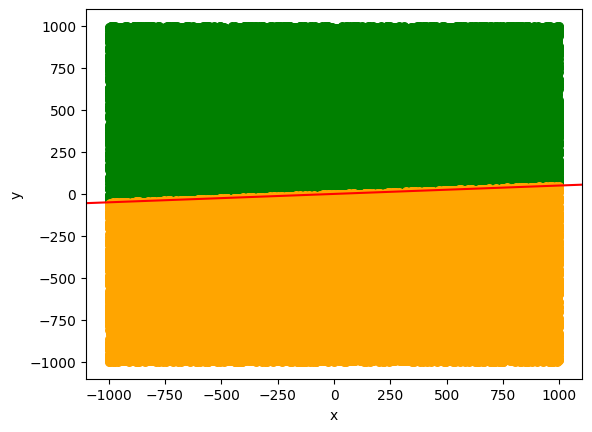

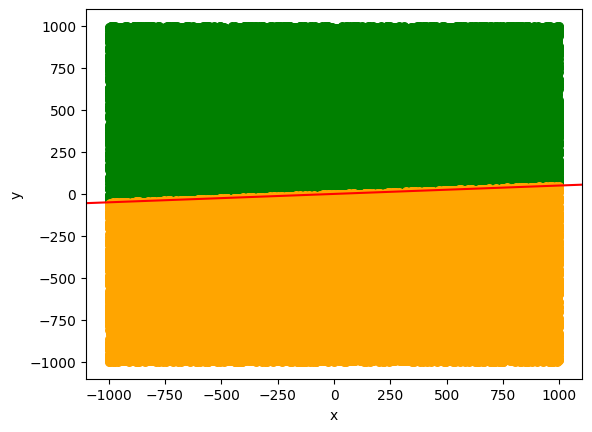

In [37]:
i = 0
print("group: ",names[i])
group = point_groups[i]
for f_32 in float_32:
    print("\n\n\nf_32: ",f_32)
    for det_func in det_funcs:
        print("\nfunction:",det_func.__name__)
        for epsilon in eps:
            if float_32:
                epsilon = np.float32(epsilon)
            print("eps: ",epsilon)
            classified_left,classified_mid,classified_right = categorize_points(group, a, b, det_func, epsilon,f_32)
            print("eps: ",epsilon,"det_func: ",det_func.__name__,"f_32: ",f_32)
            print(len(classified_left),len(classified_mid),len(classified_right))
            draw_line(classified_left, classified_mid, classified_right)
    group = np.float32(point_groups[i])

print("\n ------------------------ \n")



group:  B



f_32:  False

function: mat_det_3x3
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3 f_32:  False
49939 0 50061
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3 f_32:  False
49939 0 50061
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3 f_32:  False
49939 0 50061
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3 f_32:  False
49939 0 50061

function: mat_det_2x2
eps:  1e-14
eps:  1e-14 det_func:  mat_det_2x2 f_32:  False
49935 8 50057
eps:  1e-12
eps:  1e-12 det_func:  mat_det_2x2 f_32:  False
49935 8 50057
eps:  1e-10
eps:  1e-10 det_func:  mat_det_2x2 f_32:  False
49935 8 50057
eps:  1e-08
eps:  1e-08 det_func:  mat_det_2x2 f_32:  False
49935 8 50057

function: mat_det_3x3_lib
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3_lib f_32:  False
49939 0 50061
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3_lib f_32:  False
49939 0 50061
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3_lib f_32:  False
49939 0 50061
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3_lib f_32:  False
49939 0 500

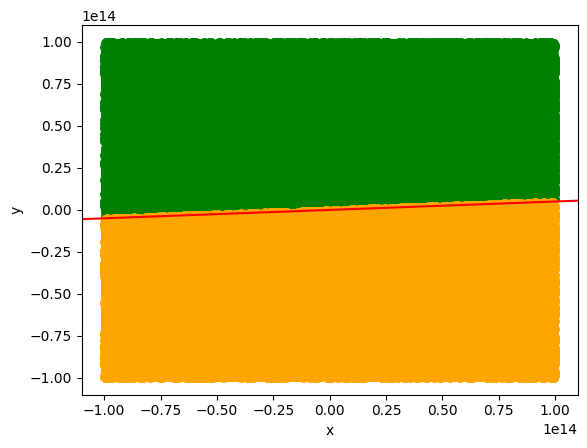

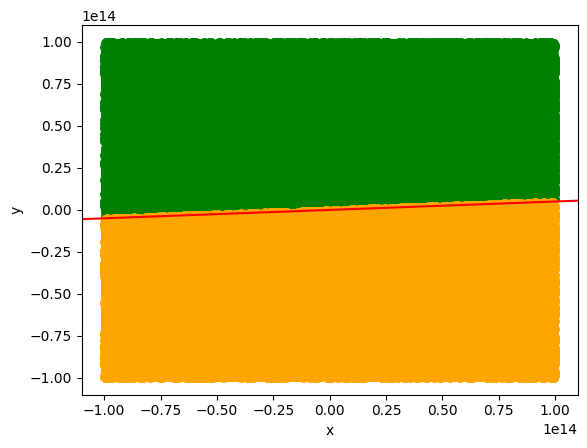

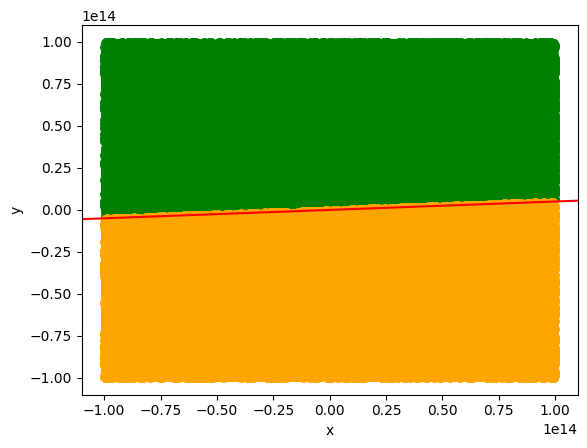

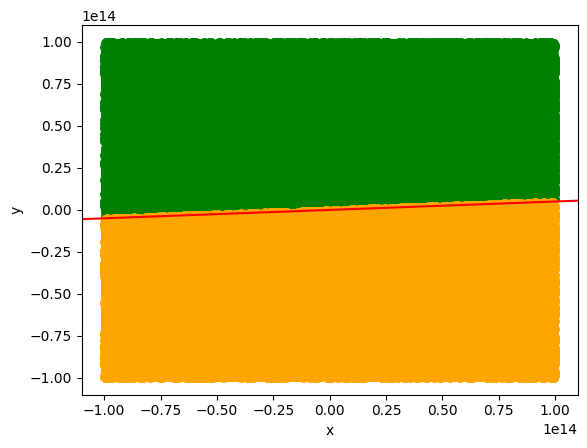

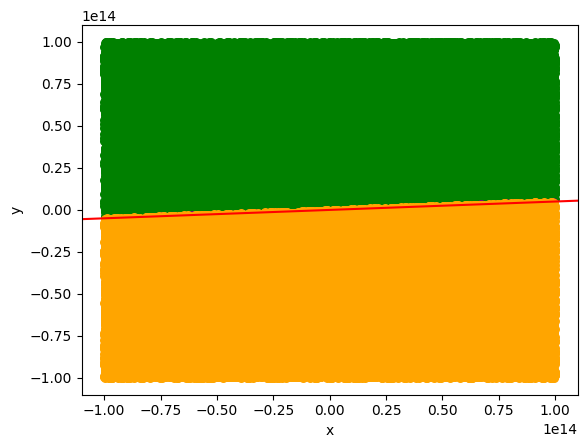

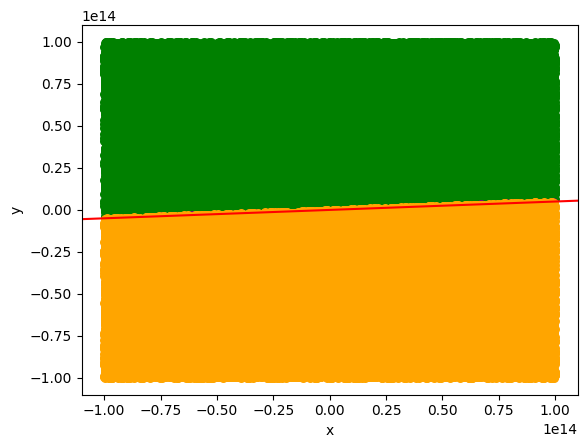

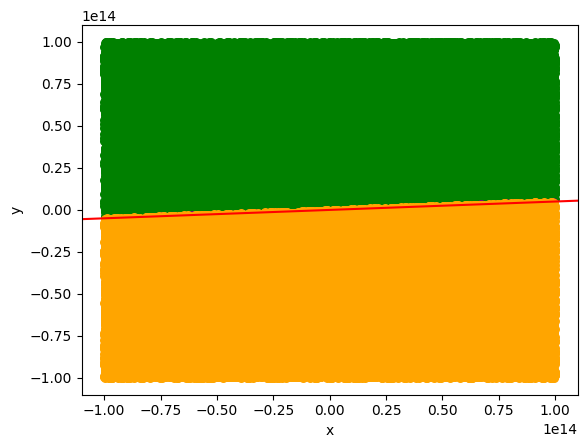

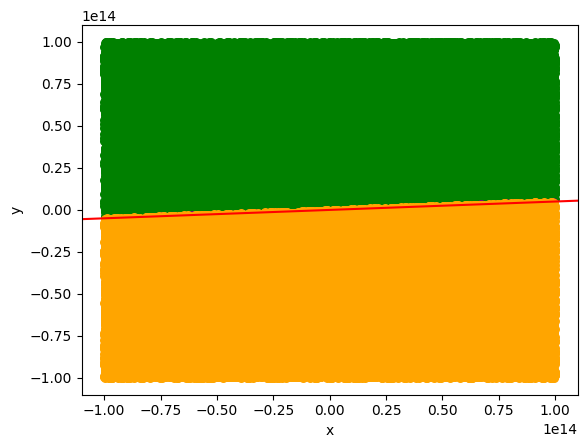

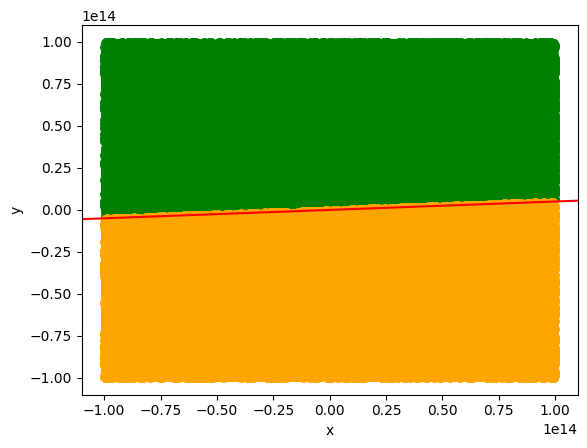

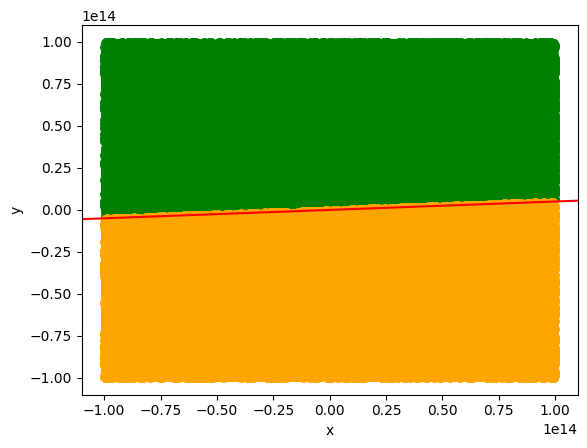

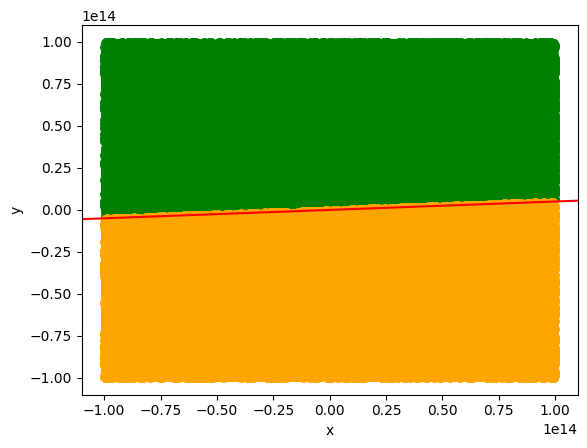

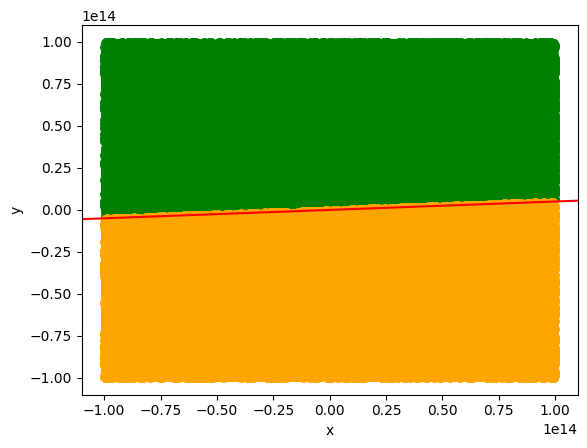

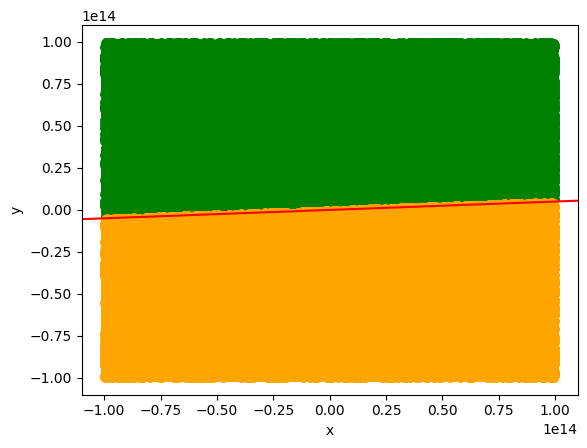

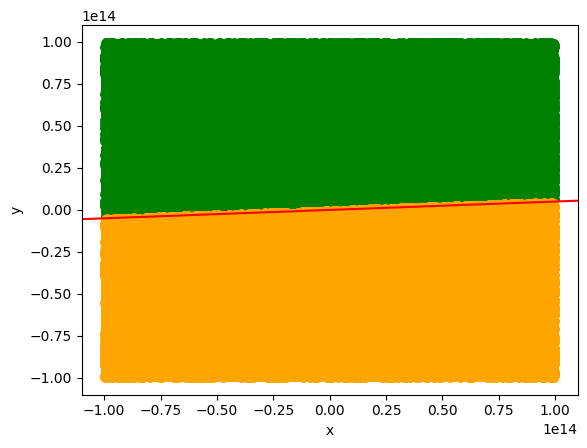

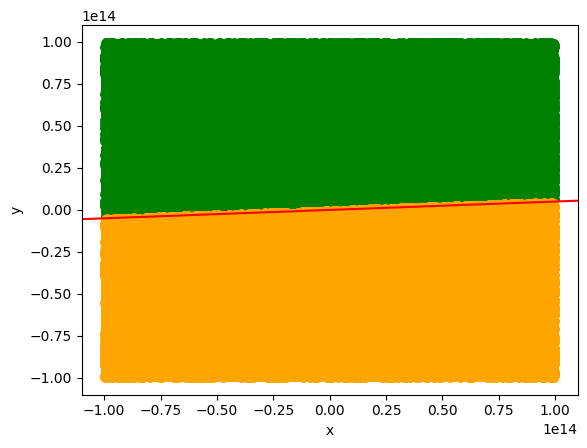

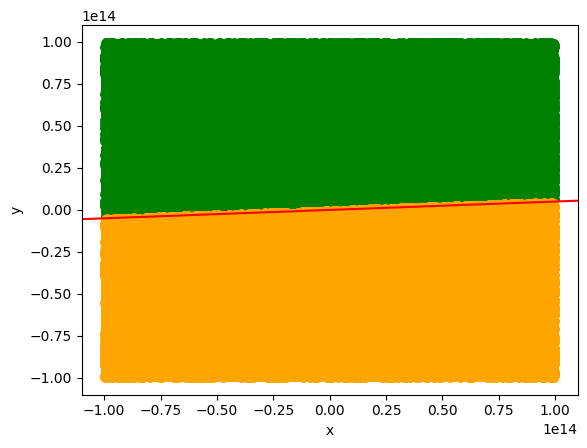

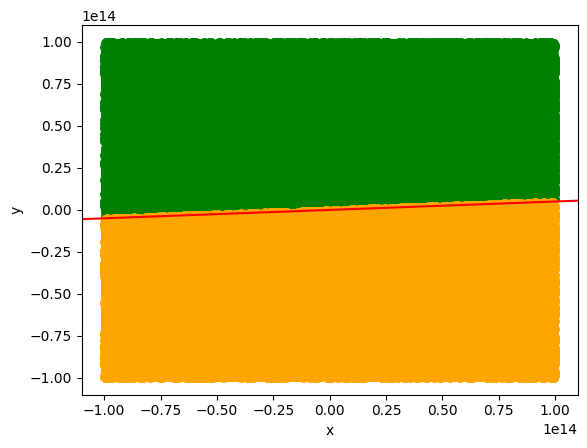

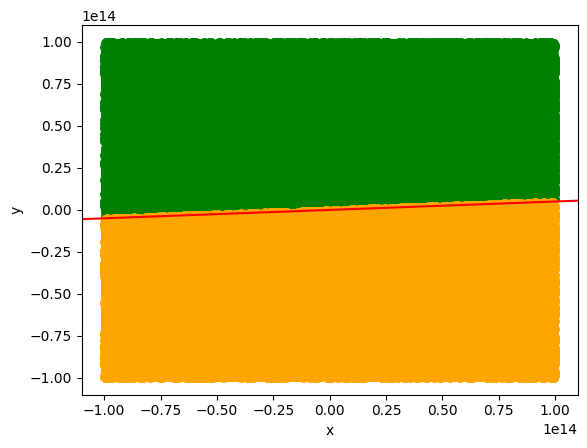

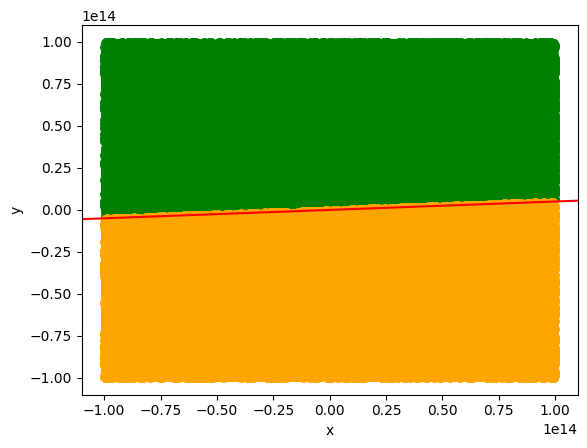

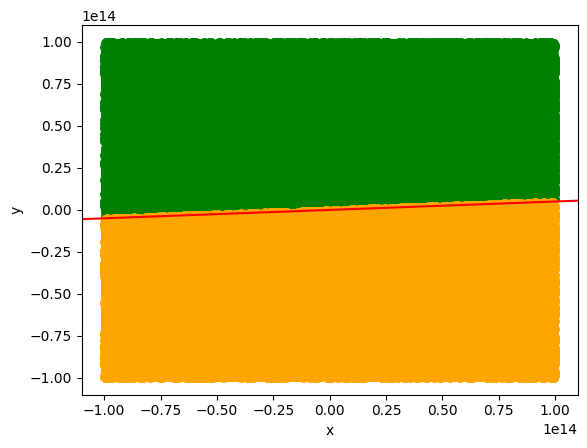

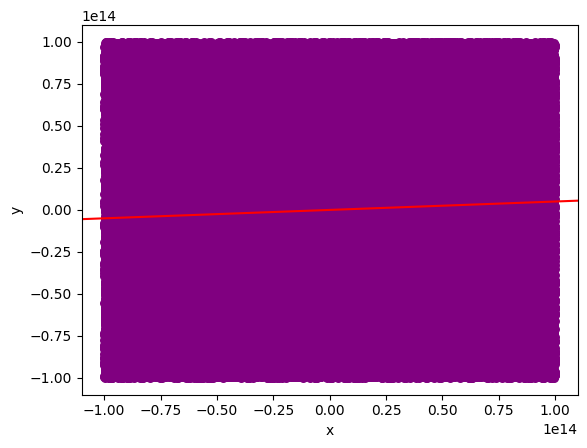

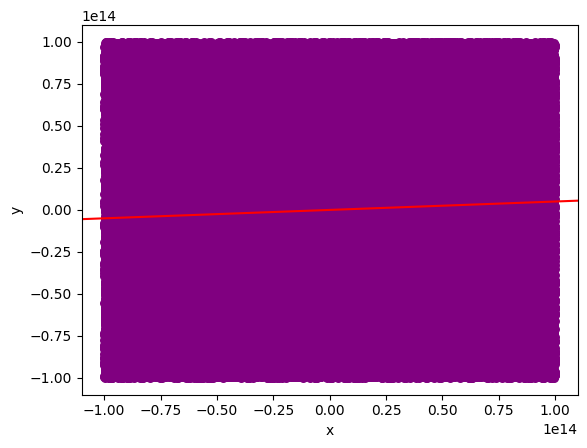

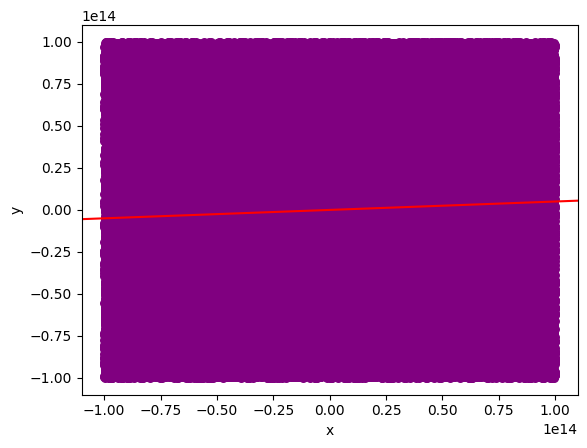

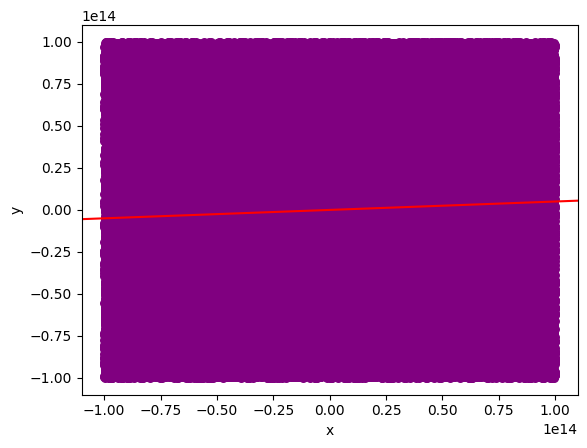

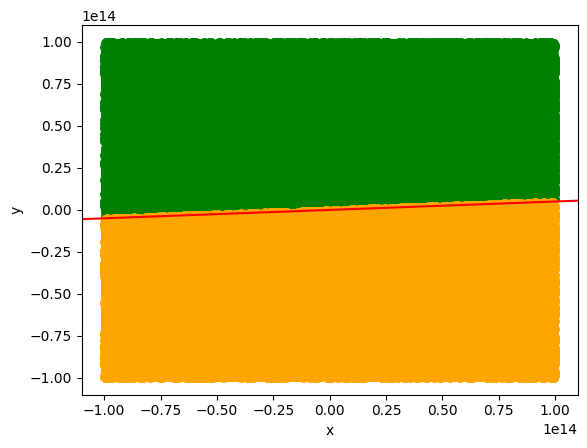

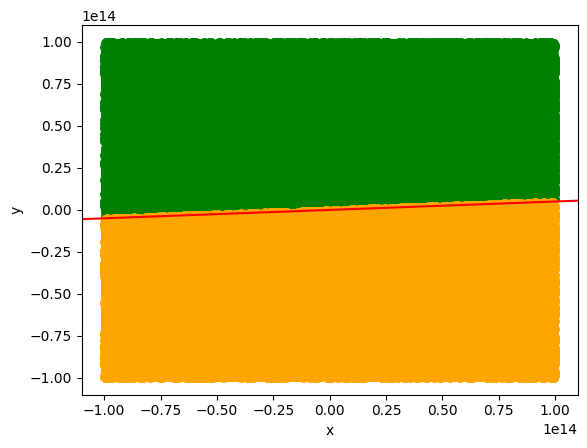

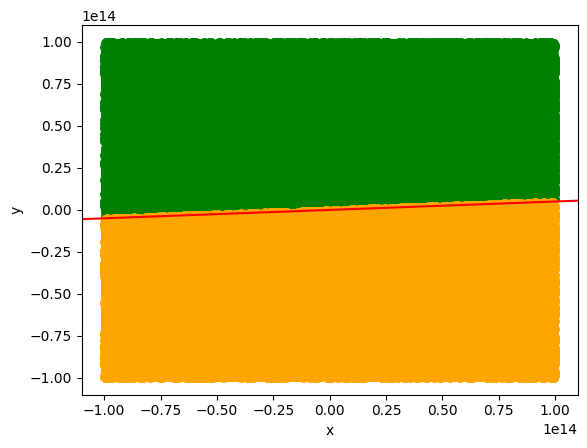

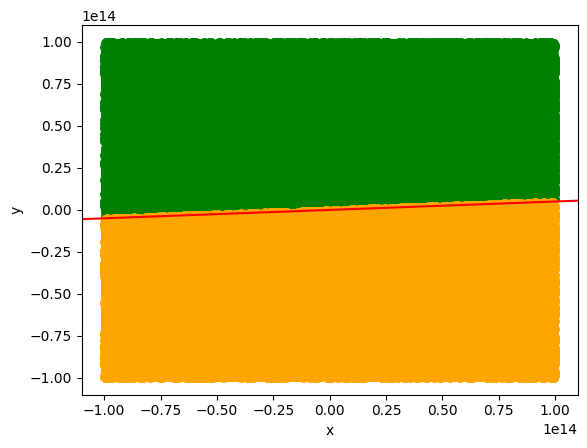

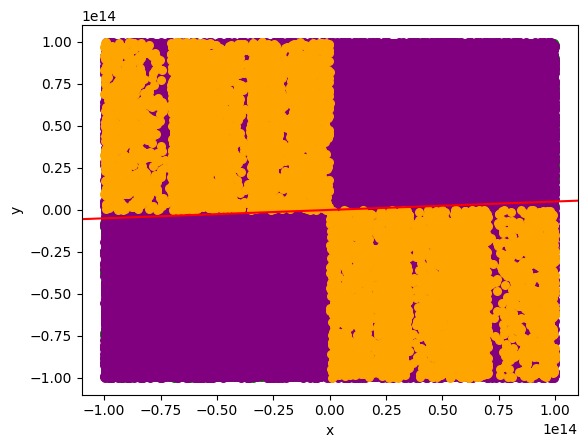

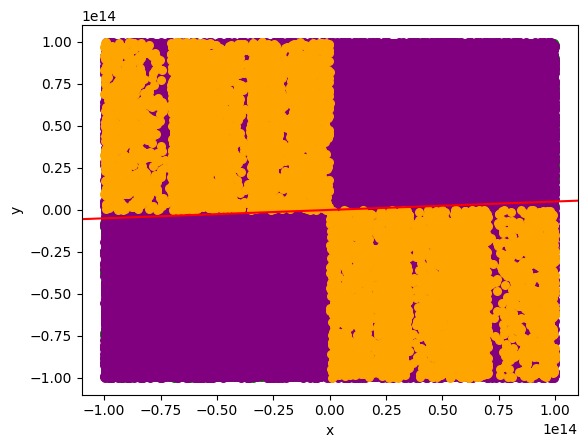

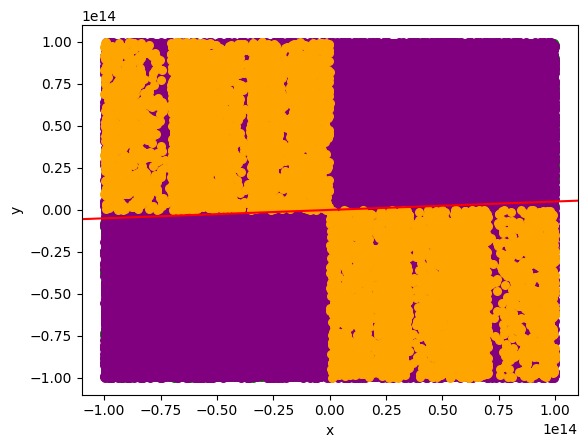

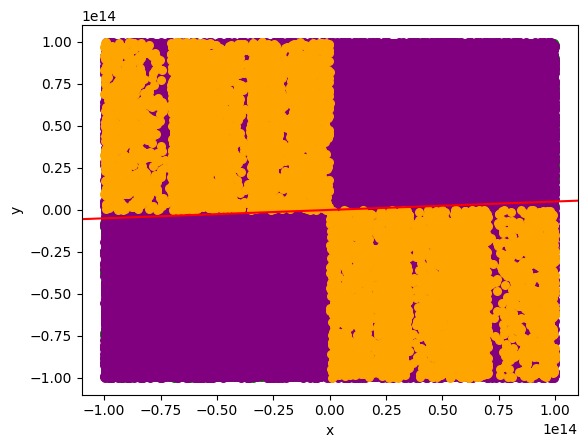

In [38]:
i = 1
print("group: ",names[i])
group = point_groups[i]
for f_32 in float_32:
    print("\n\n\nf_32: ",f_32)
    for det_func in det_funcs:
        print("\nfunction:",det_func.__name__)
        for epsilon in eps:
            if float_32:
                epsilon = np.float32(epsilon)
            print("eps: ",epsilon)
            classified_left,classified_mid,classified_right = categorize_points(group, a, b, det_func, epsilon,f_32)
            print("eps: ",epsilon,"det_func: ",det_func.__name__,"f_32: ",f_32)
            print(len(classified_left),len(classified_mid),len(classified_right))
            draw_line(classified_left, classified_mid, classified_right)
    group = np.float32(point_groups[i])

print("\n ------------------------ \n")



group:  C



f_32:  False

function: mat_det_3x3
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3 f_32:  False
488 0 512
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3 f_32:  False
488 0 512
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3 f_32:  False
488 0 512
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3 f_32:  False
488 0 512

function: mat_det_2x2
eps:  1e-14
eps:  1e-14 det_func:  mat_det_2x2 f_32:  False
488 0 512
eps:  1e-12
eps:  1e-12 det_func:  mat_det_2x2 f_32:  False
488 0 512
eps:  1e-10
eps:  1e-10 det_func:  mat_det_2x2 f_32:  False
488 0 512
eps:  1e-08
eps:  1e-08 det_func:  mat_det_2x2 f_32:  False
488 0 512

function: mat_det_3x3_lib
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3_lib f_32:  False
488 0 512
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3_lib f_32:  False
488 0 512
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3_lib f_32:  False
488 0 512
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3_lib f_32:  False
488 0 512

function: mat_det_2x2_lib
eps:  1e-14
eps:  

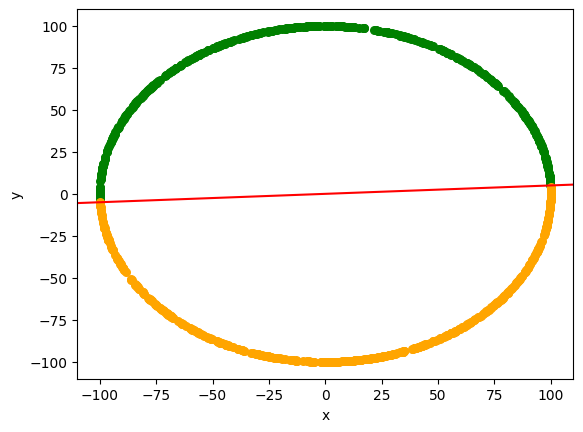

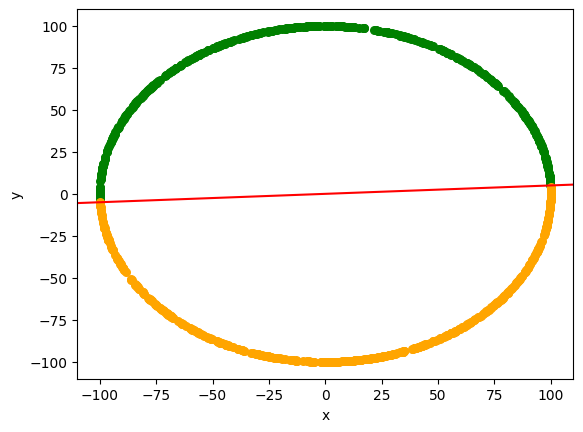

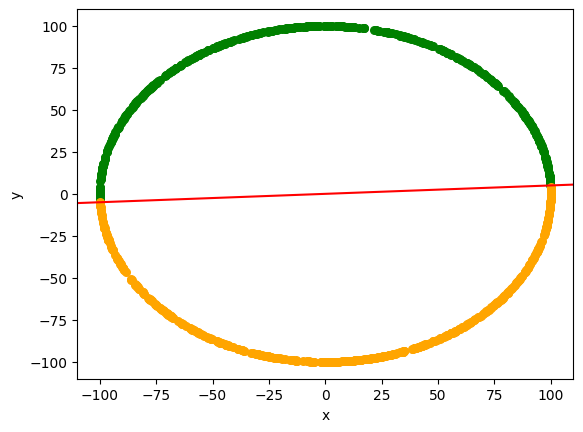

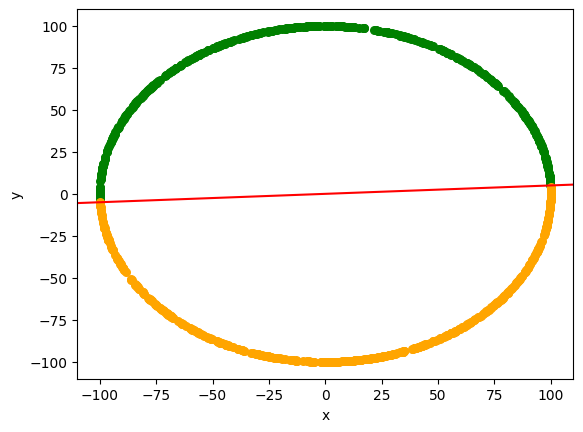

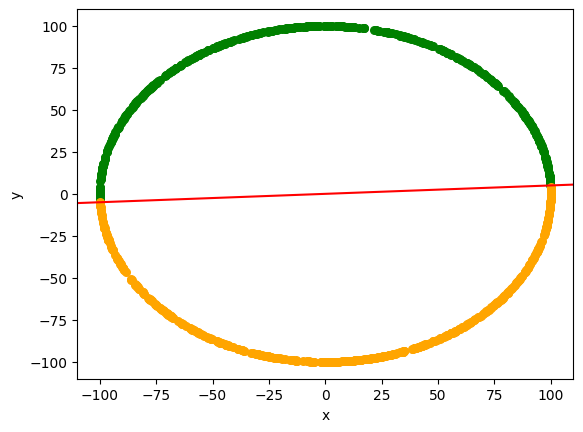

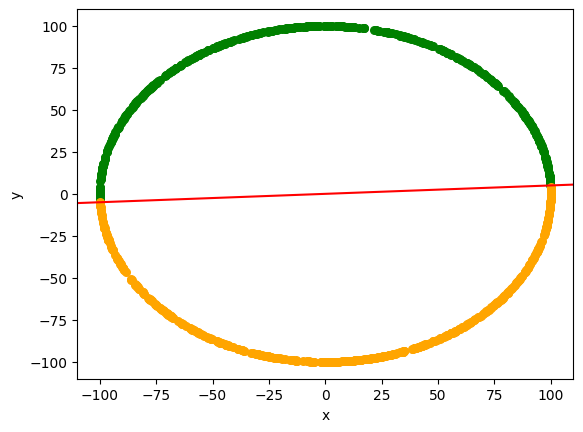

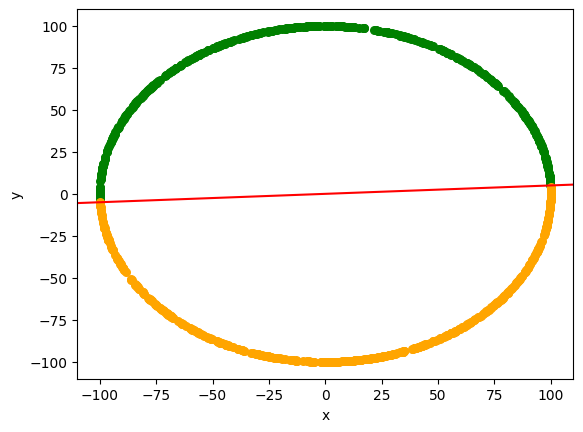

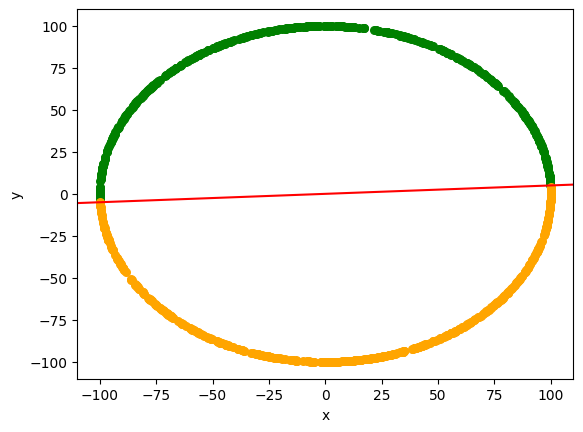

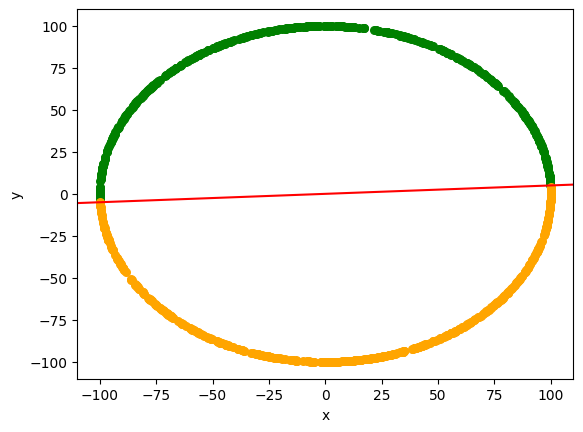

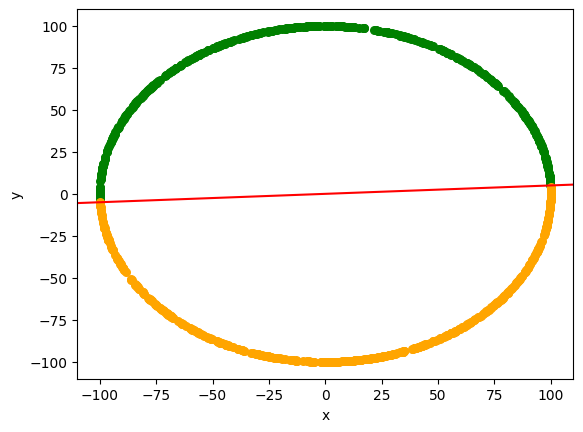

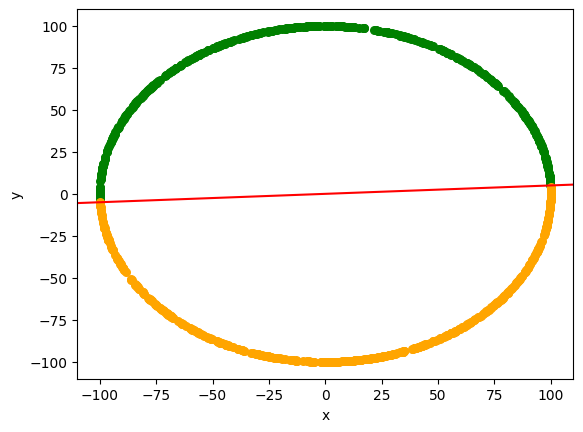

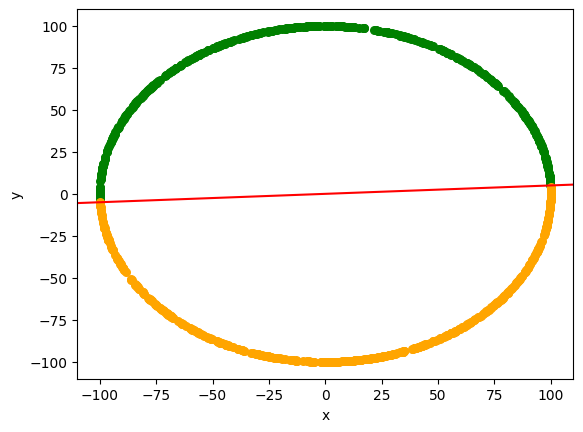

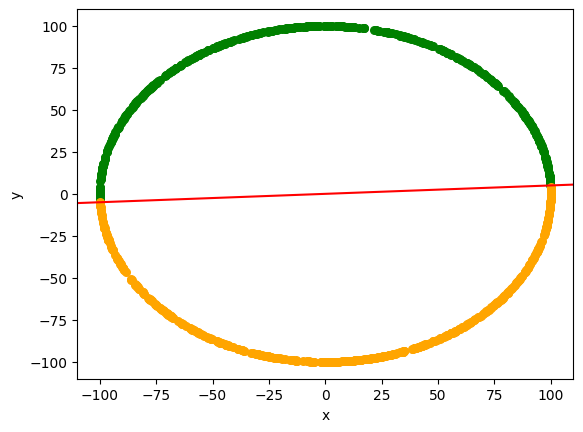

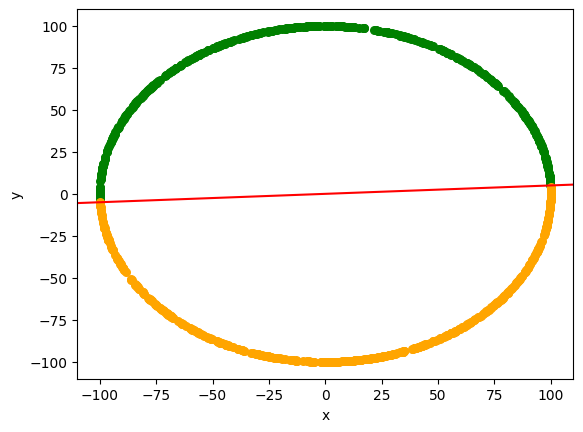

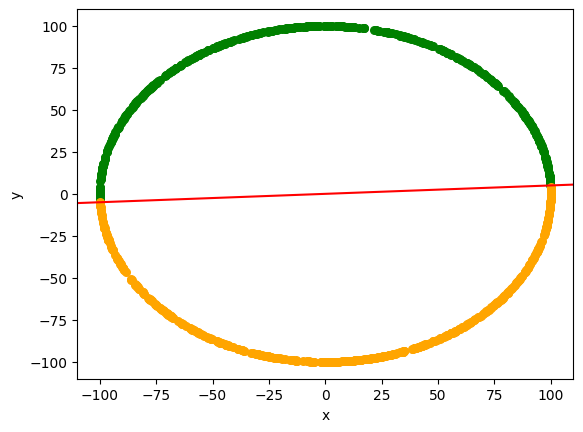

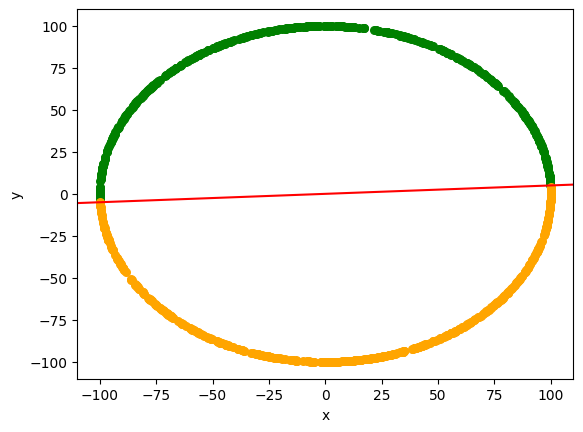

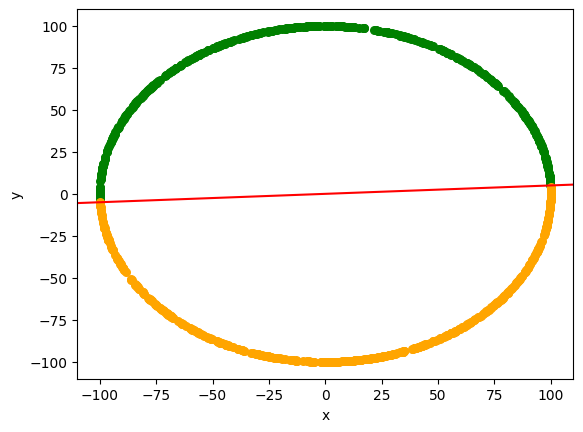

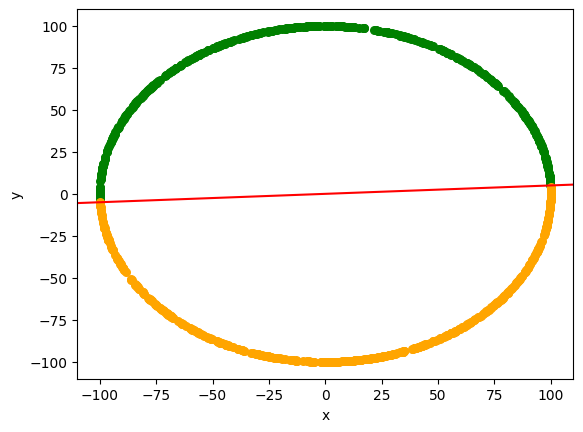

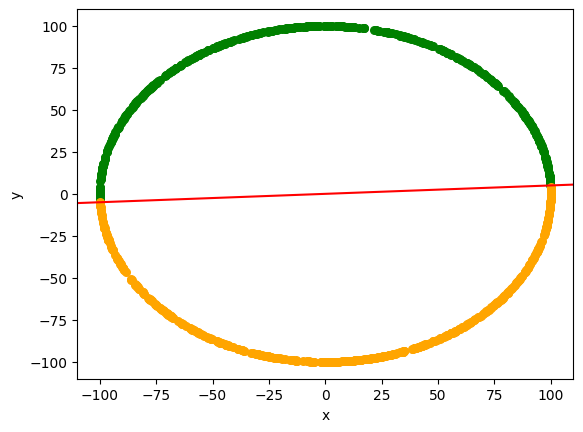

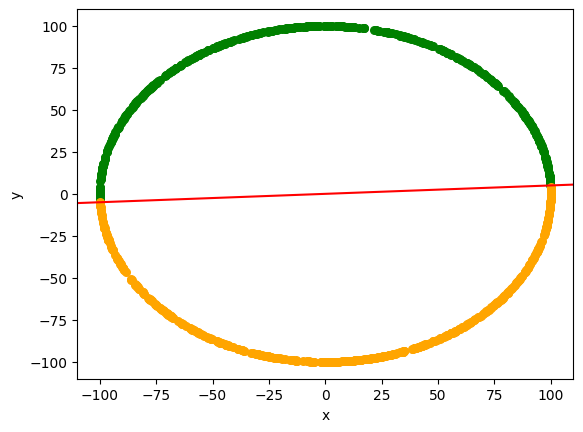

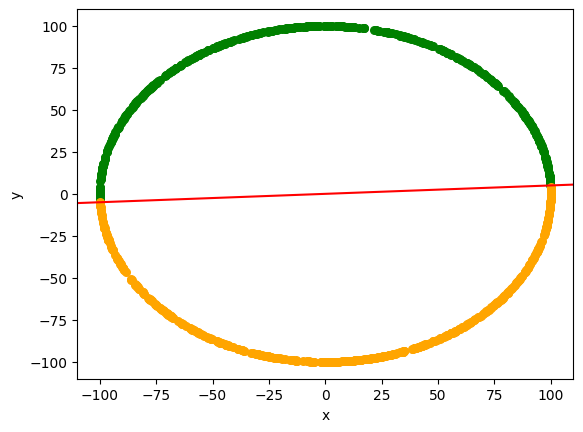

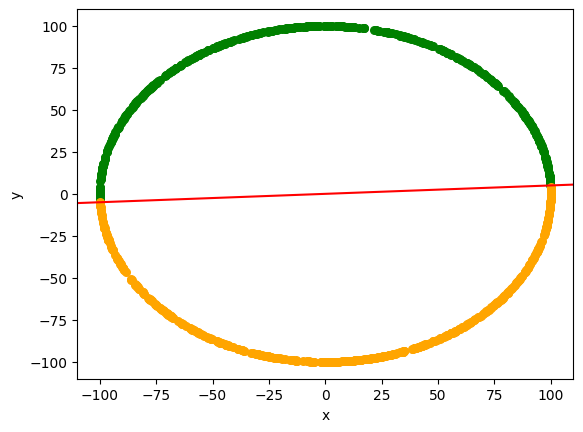

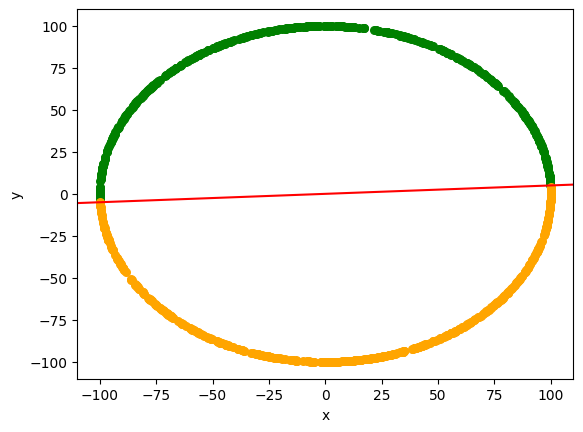

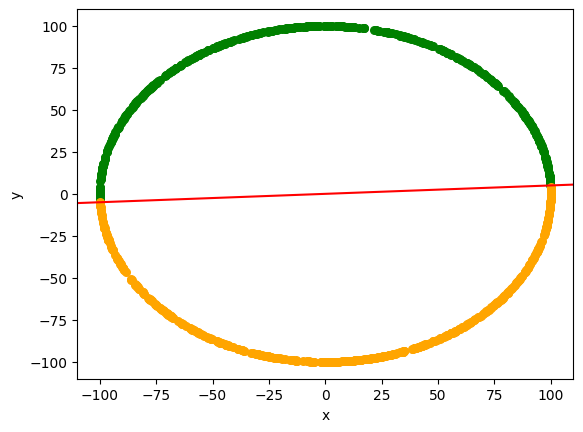

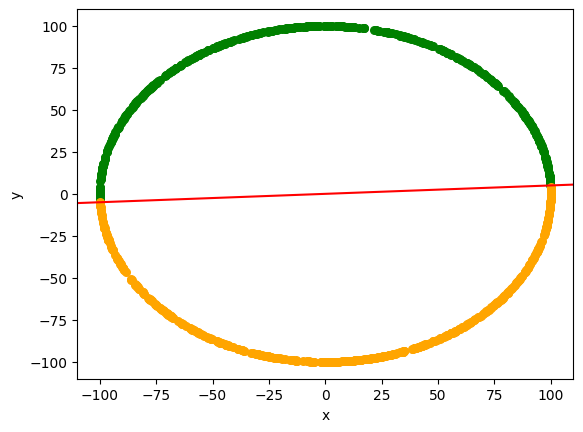

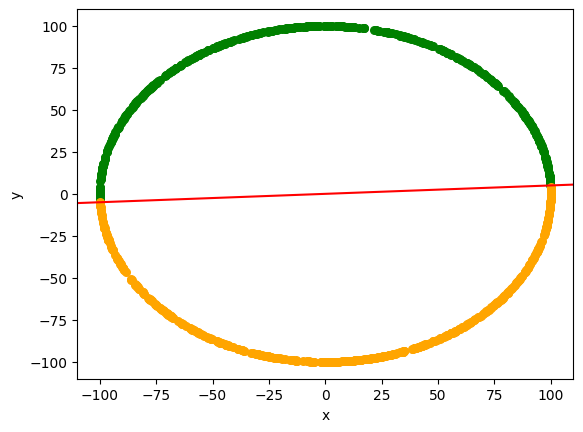

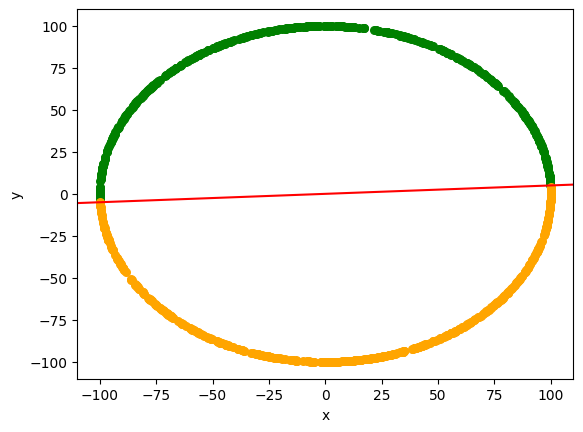

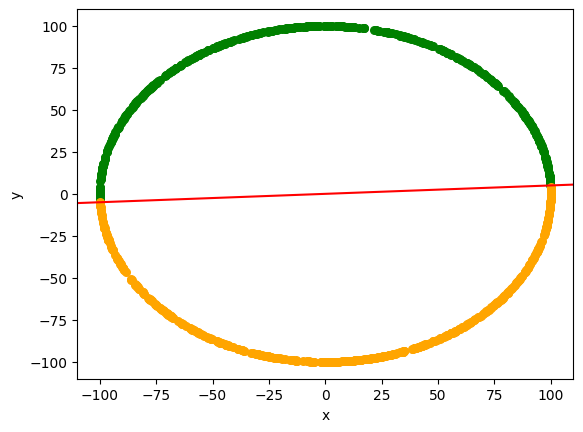

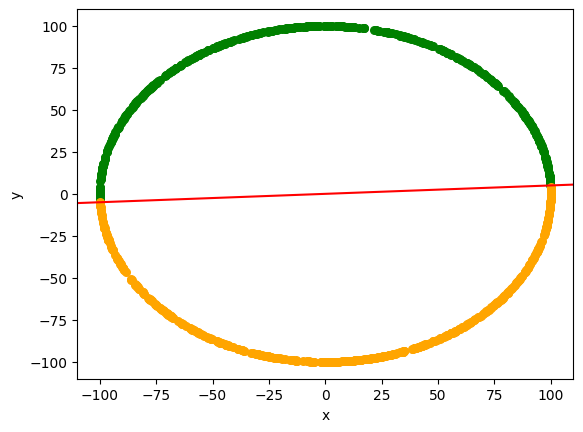

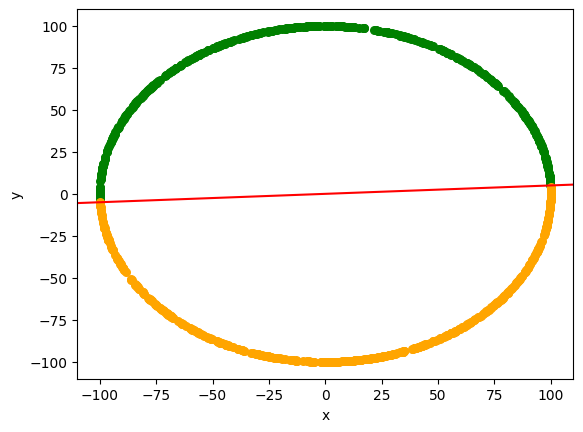

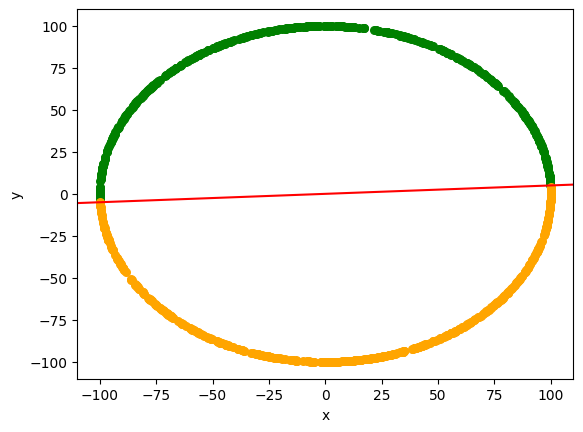

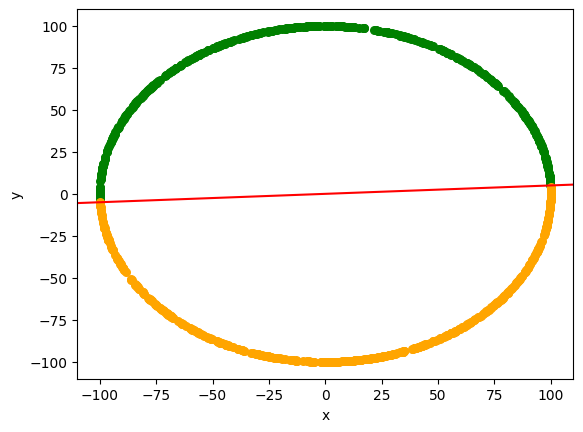

In [39]:
i = 2
print("group: ",names[i])
group = point_groups[i]
for f_32 in float_32:
    print("\n\n\nf_32: ",f_32)
    for det_func in det_funcs:
        print("\nfunction:",det_func.__name__)
        for epsilon in eps:
            if float_32:
                epsilon = np.float32(epsilon)
            print("eps: ",epsilon)
            classified_left,classified_mid,classified_right = categorize_points(group, a, b, det_func, epsilon,f_32)
            print("eps: ",epsilon,"det_func: ",det_func.__name__,"f_32: ",f_32)
            print(len(classified_left),len(classified_mid),len(classified_right))
            draw_line(classified_left, classified_mid, classified_right)
    group = np.float32(point_groups[i])

print("\n ------------------------ \n")



group:  D



f_32:  False

function: mat_det_3x3
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3 f_32:  False
0 1000 0
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3 f_32:  False
0 1000 0
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3 f_32:  False
0 1000 0
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3 f_32:  False
0 1000 0

function: mat_det_2x2
eps:  1e-14
eps:  1e-14 det_func:  mat_det_2x2 f_32:  False
150 709 141
eps:  1e-12
eps:  1e-12 det_func:  mat_det_2x2 f_32:  False
86 825 89
eps:  1e-10
eps:  1e-10 det_func:  mat_det_2x2 f_32:  False
0 1000 0
eps:  1e-08
eps:  1e-08 det_func:  mat_det_2x2 f_32:  False
0 1000 0

function: mat_det_3x3_lib
eps:  1e-14
eps:  1e-14 det_func:  mat_det_3x3_lib f_32:  False
20 881 99
eps:  1e-12
eps:  1e-12 det_func:  mat_det_3x3_lib f_32:  False
0 1000 0
eps:  1e-10
eps:  1e-10 det_func:  mat_det_3x3_lib f_32:  False
0 1000 0
eps:  1e-08
eps:  1e-08 det_func:  mat_det_3x3_lib f_32:  False
0 1000 0

function: mat_det_2x2_lib
eps:  1e-14
eps:  1e-14 d

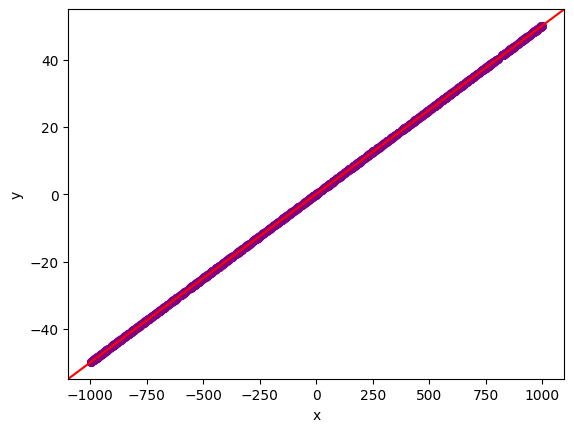

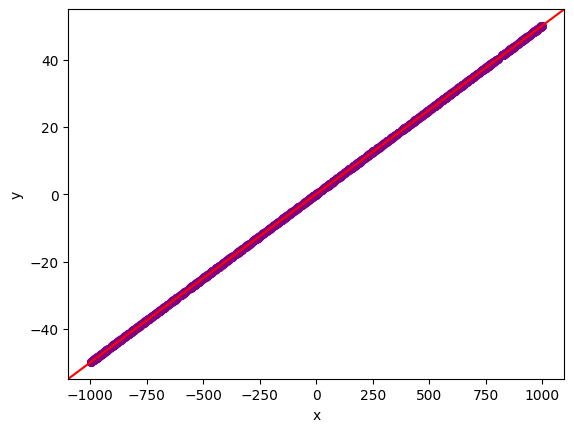

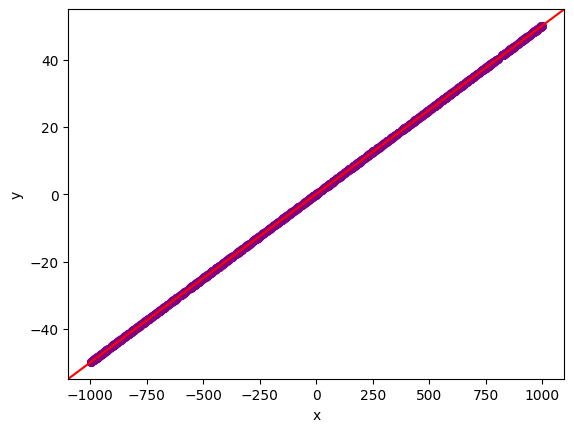

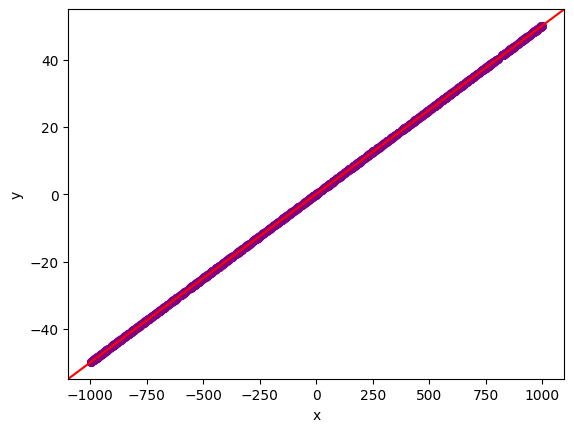

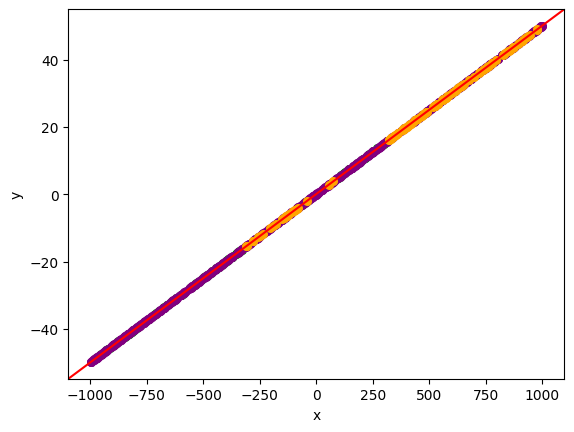

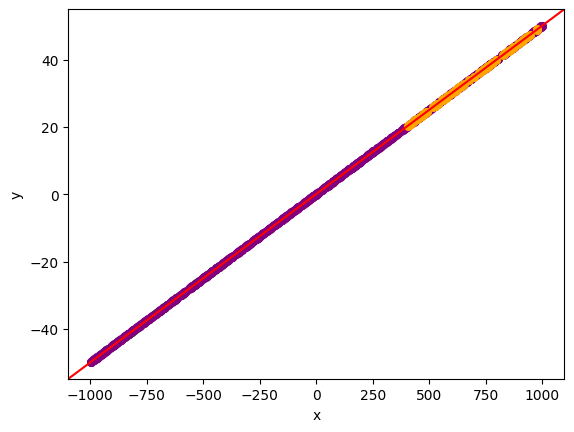

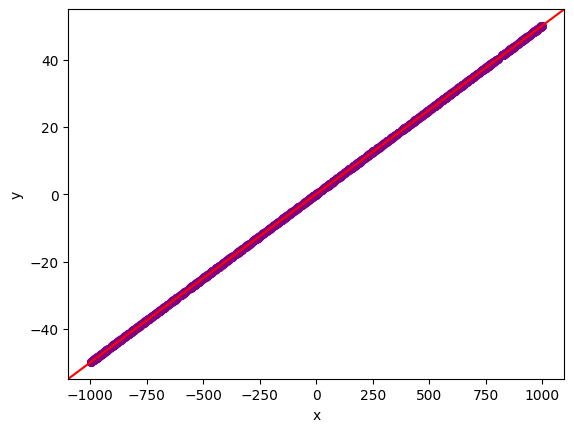

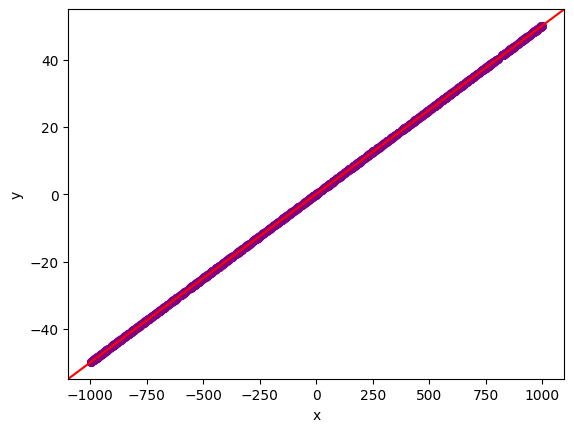

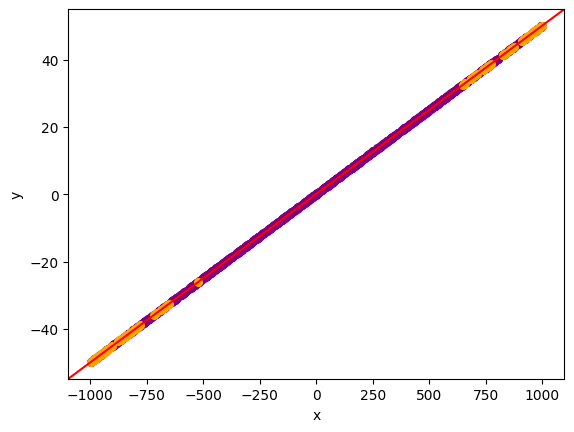

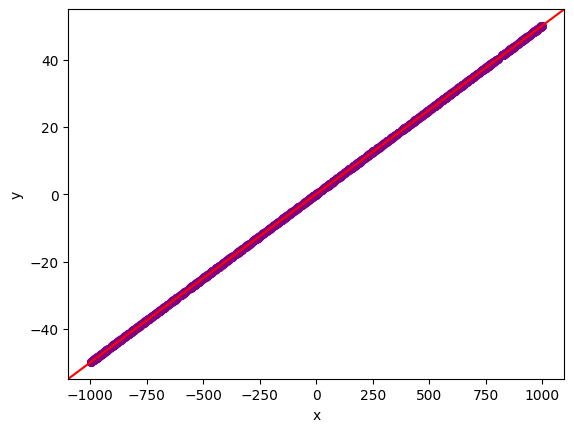

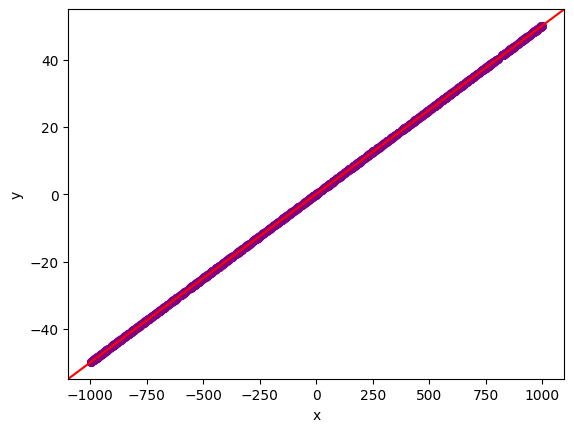

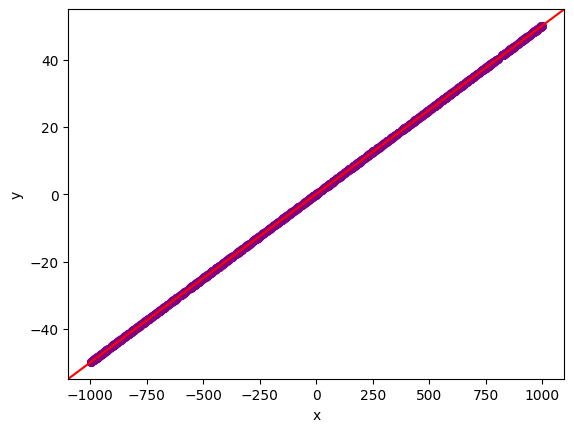

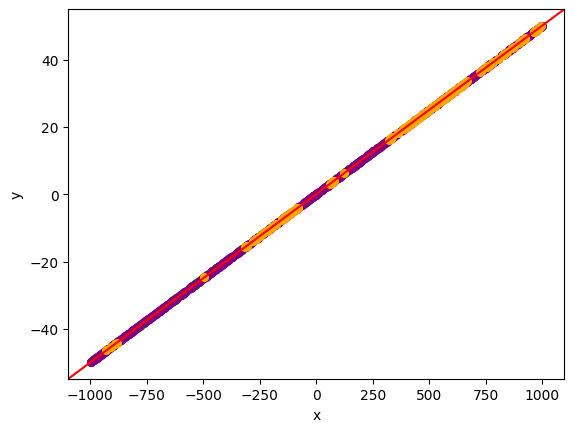

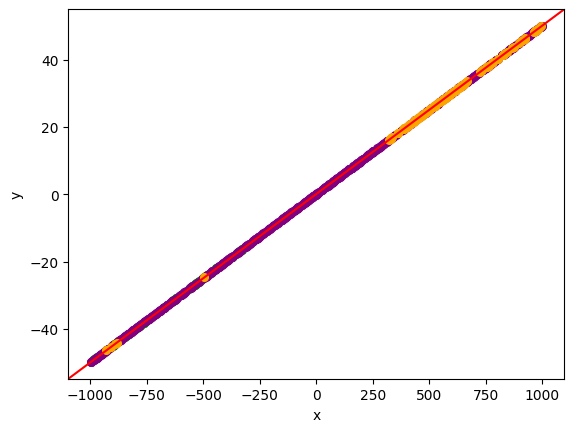

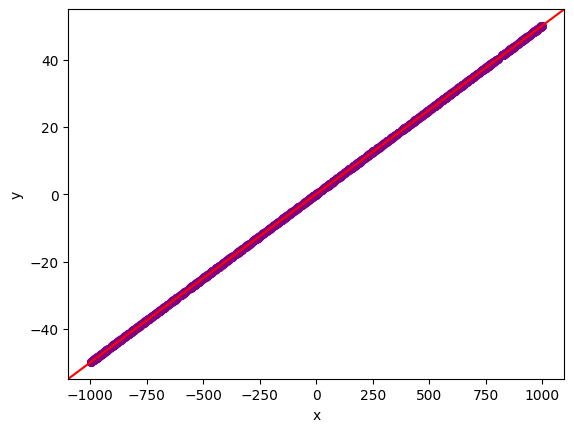

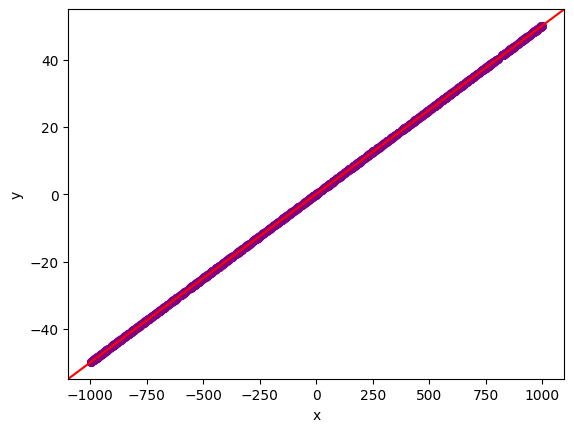

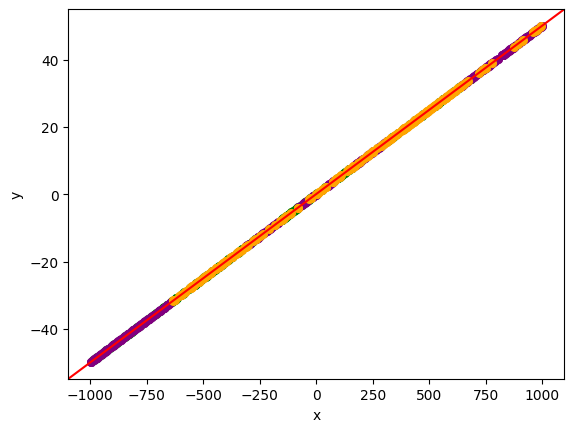

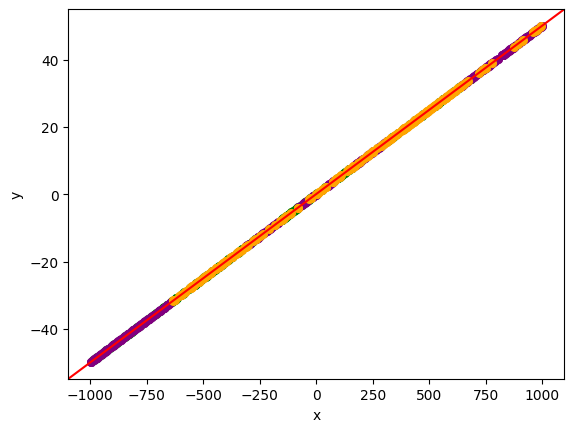

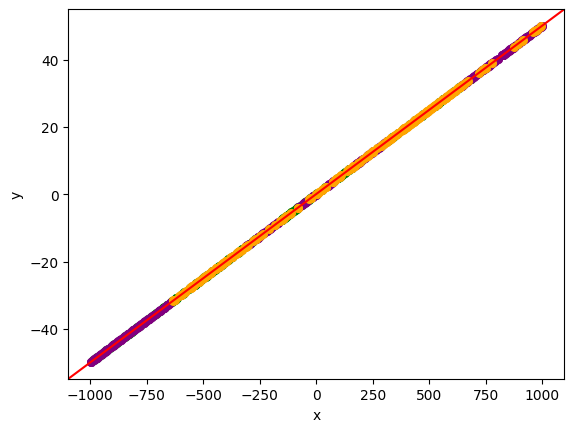

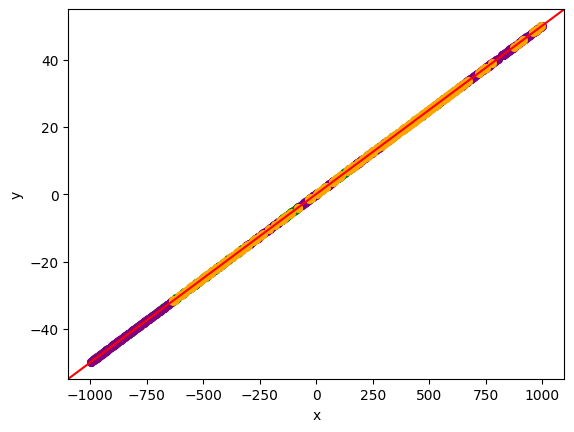

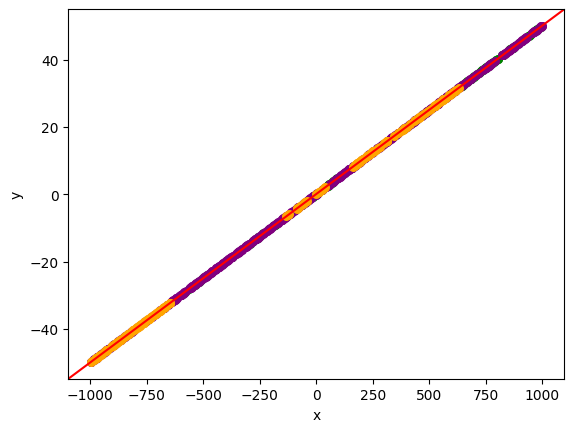

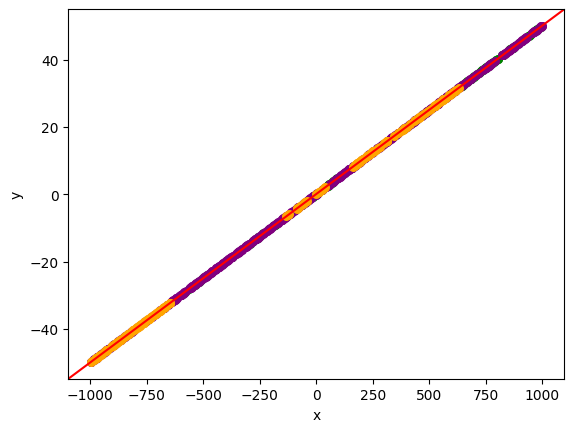

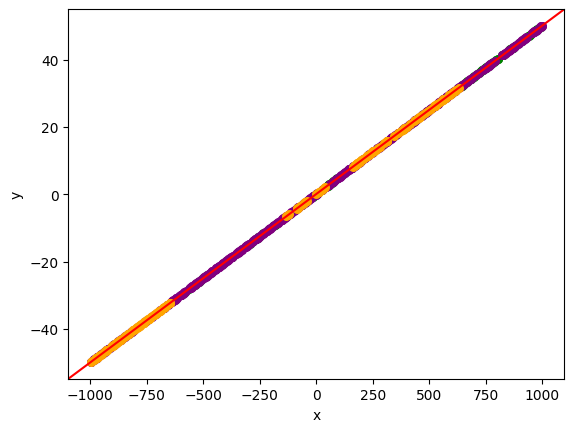

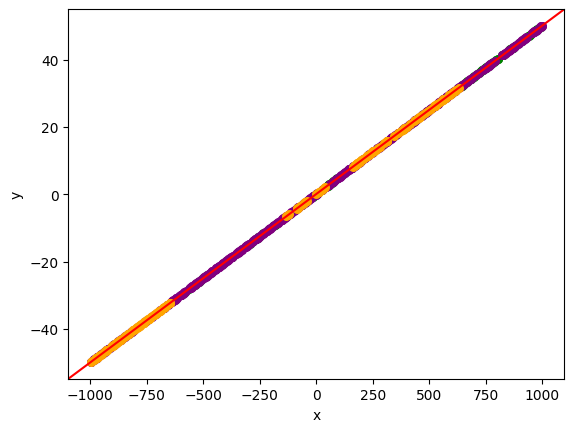

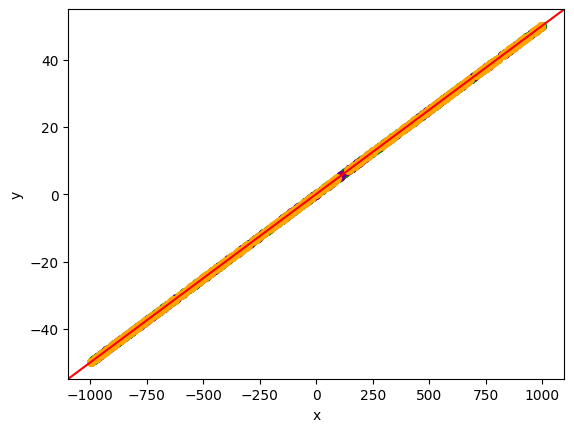

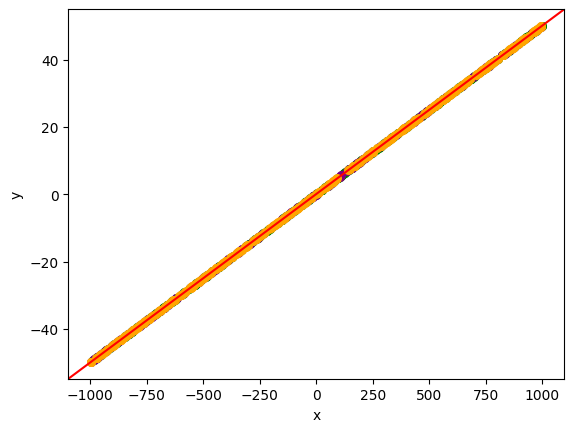

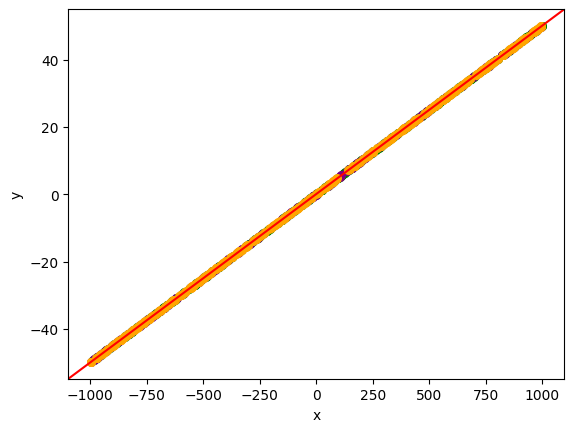

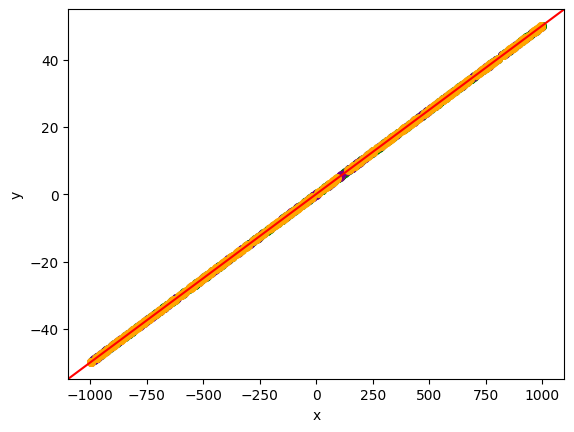

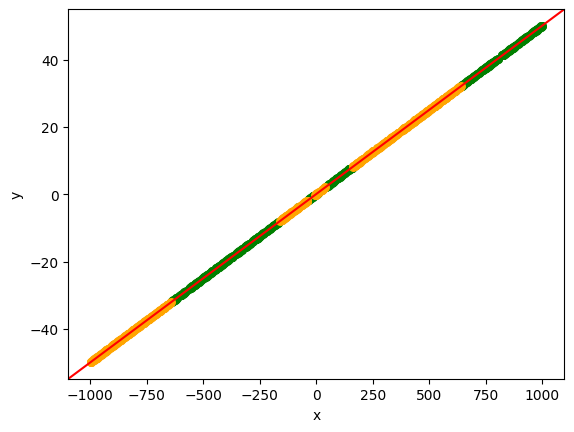

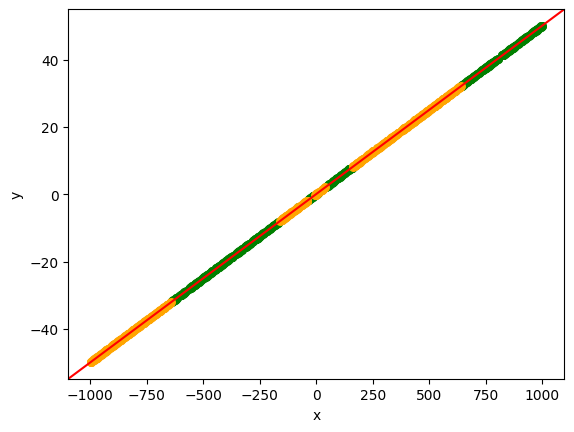

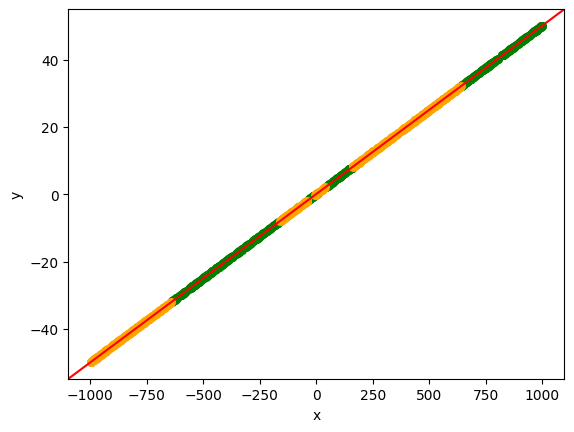

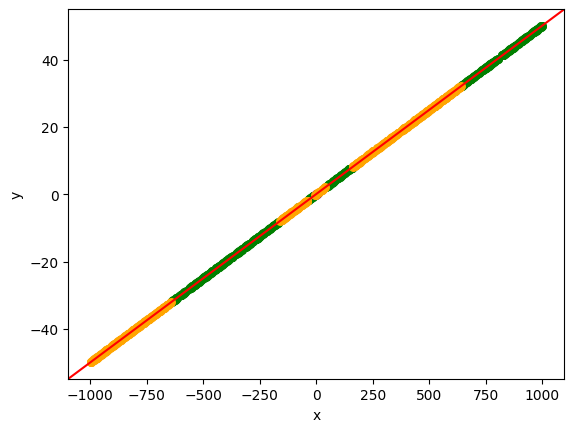

In [40]:
i = 3
print("group: ",names[i])
group = point_groups[i]
for f_32 in float_32:
    print("\n\n\nf_32: ",f_32)
    for det_func in det_funcs:
        print("\nfunction:",det_func.__name__)
        for epsilon in eps:
            if float_32:
                epsilon = np.float32(epsilon)
            print("eps: ",epsilon)
            classified_left,classified_mid,classified_right = categorize_points(group, a, b, det_func, epsilon,f_32)
            print("eps: ",epsilon,"det_func: ",det_func.__name__,"f_32: ",f_32)
            print(len(classified_left),len(classified_mid),len(classified_right))
            draw_line(classified_left, classified_mid, classified_right)
    group = np.float32(point_groups[i])

print("\n ------------------------ \n")

